In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import os
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import sys
from collections import OrderedDict

import warnings
warnings.filterwarnings("ignore")

# M31 PRINCIPAL COMPONENT ANALYSIS

In [2]:
# M31
m31_oid = np.memmap('../data/oid_m31.dat', mode='r', dtype=np.uint64)
m31_names = open('../data/feature_m31.name').read().split()
m31_x = np.memmap('../data/feature_m31.dat', mode='r', dtype=np.float32, shape=(m31_oid.size, len(m31_names)))

In [3]:
m31 = pd.DataFrame(m31_x, index=m31_oid, columns=m31_names)
m31

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
695211400017839,0.699500,0.227941,0.036765,0.128972,1.576097,4.729054e+09,0.212000,0.450199,3.944156,-0.001640,...,0.148243,0.038084,0.959692,1.045485,9.733143,1.391858,-1.312442,0.202145,0.664184,20.516939
695211400043887,0.443000,0.288889,0.044444,0.179944,1.524735,3.644123e+09,0.204000,0.400000,0.133404,-0.000005,...,0.156987,0.032495,0.875076,0.984689,10.104938,0.548229,-0.357512,0.163288,0.792986,20.698317
695211400043454,0.589499,0.280000,0.032000,0.191169,1.652675,2.317022e+09,0.204500,0.484001,1.439840,0.000048,...,0.144973,0.031337,0.856762,0.939969,7.261847,0.791332,-0.746378,0.190502,0.728758,20.749649
695211400042791,0.604000,0.261745,0.053691,0.158801,1.574722,1.996893e+09,0.203499,0.433001,1.735631,0.000804,...,0.159723,0.033665,0.761747,0.886971,8.016976,0.915853,-0.816090,0.178804,0.737000,20.493862
695211400016239,0.825500,0.196203,0.025316,0.085341,1.951849,2.571876e+09,0.155001,0.323599,18.212532,-0.002264,...,0.176922,0.049399,0.618860,0.638475,5.355614,1.734685,-2.598536,0.162091,0.504324,20.329548
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695211200027762,0.137500,0.300000,0.032000,0.076794,1.583493,6.722693e+09,0.053001,0.105000,0.686157,-0.000049,...,0.172669,0.028054,0.722513,0.826720,9.868394,1.089929,-0.198571,0.041880,0.782368,18.673153
695211200001880,0.049500,0.283465,0.055118,0.151784,1.451552,2.788117e+09,0.018000,0.037000,0.999901,-0.000003,...,0.165232,0.017666,0.749936,0.936336,12.354101,1.967448,0.421042,0.015429,0.763788,14.979458
695211200027621,0.073500,0.274590,0.049180,0.083840,1.638867,3.939941e+09,0.033501,0.057198,0.447904,-0.000009,...,0.165867,0.023609,0.749228,0.822715,9.576206,1.469046,-0.069856,0.024325,0.793072,17.515738
695211200002462,0.044000,0.311024,0.074803,0.152871,1.594203,2.863704e+09,0.020000,0.041000,0.126569,0.000034,...,0.174980,0.017528,0.722896,0.866926,11.782808,1.851398,0.099805,0.016328,0.791217,15.804447


In [4]:
def applypca(dataset):
    X = dataset

    #In general a good idea is to scale the data
    scaler = StandardScaler()
    scaler.fit(X)
    X=scaler.transform(X)    

    pca = PCA()
    x_new = pca.fit_transform(X)
    
    score = x_new[:,0:2]
    coeff = np.transpose(pca.components_[0:2, :])
    
    return pca, x_new, score, coeff

In [5]:
def pcaplot(score, coeff, datacolor):
    xs = score[:,0]
    ys = score[:,1]
    n = coeff.shape[0]
    scalex = 1.0/(xs.max() - xs.min())
    scaley = 1.0/(ys.max() - ys.min())
    plt.scatter(xs * scalex,ys * scaley, c=datacolor, s=6, alpha=0.6) 
    for i in range(n):
        plt.arrow(0, 0, coeff[i,0], coeff[i,1], head_width= .003, color = 'r',alpha = 0.5)
        plt.text(coeff[i,0]* 1.12, coeff[i,1] * 1.12, list(m31.columns.values)[i], 
                     color = 'darkblue', ha = 'center', va = 'center', fontsize = 6)

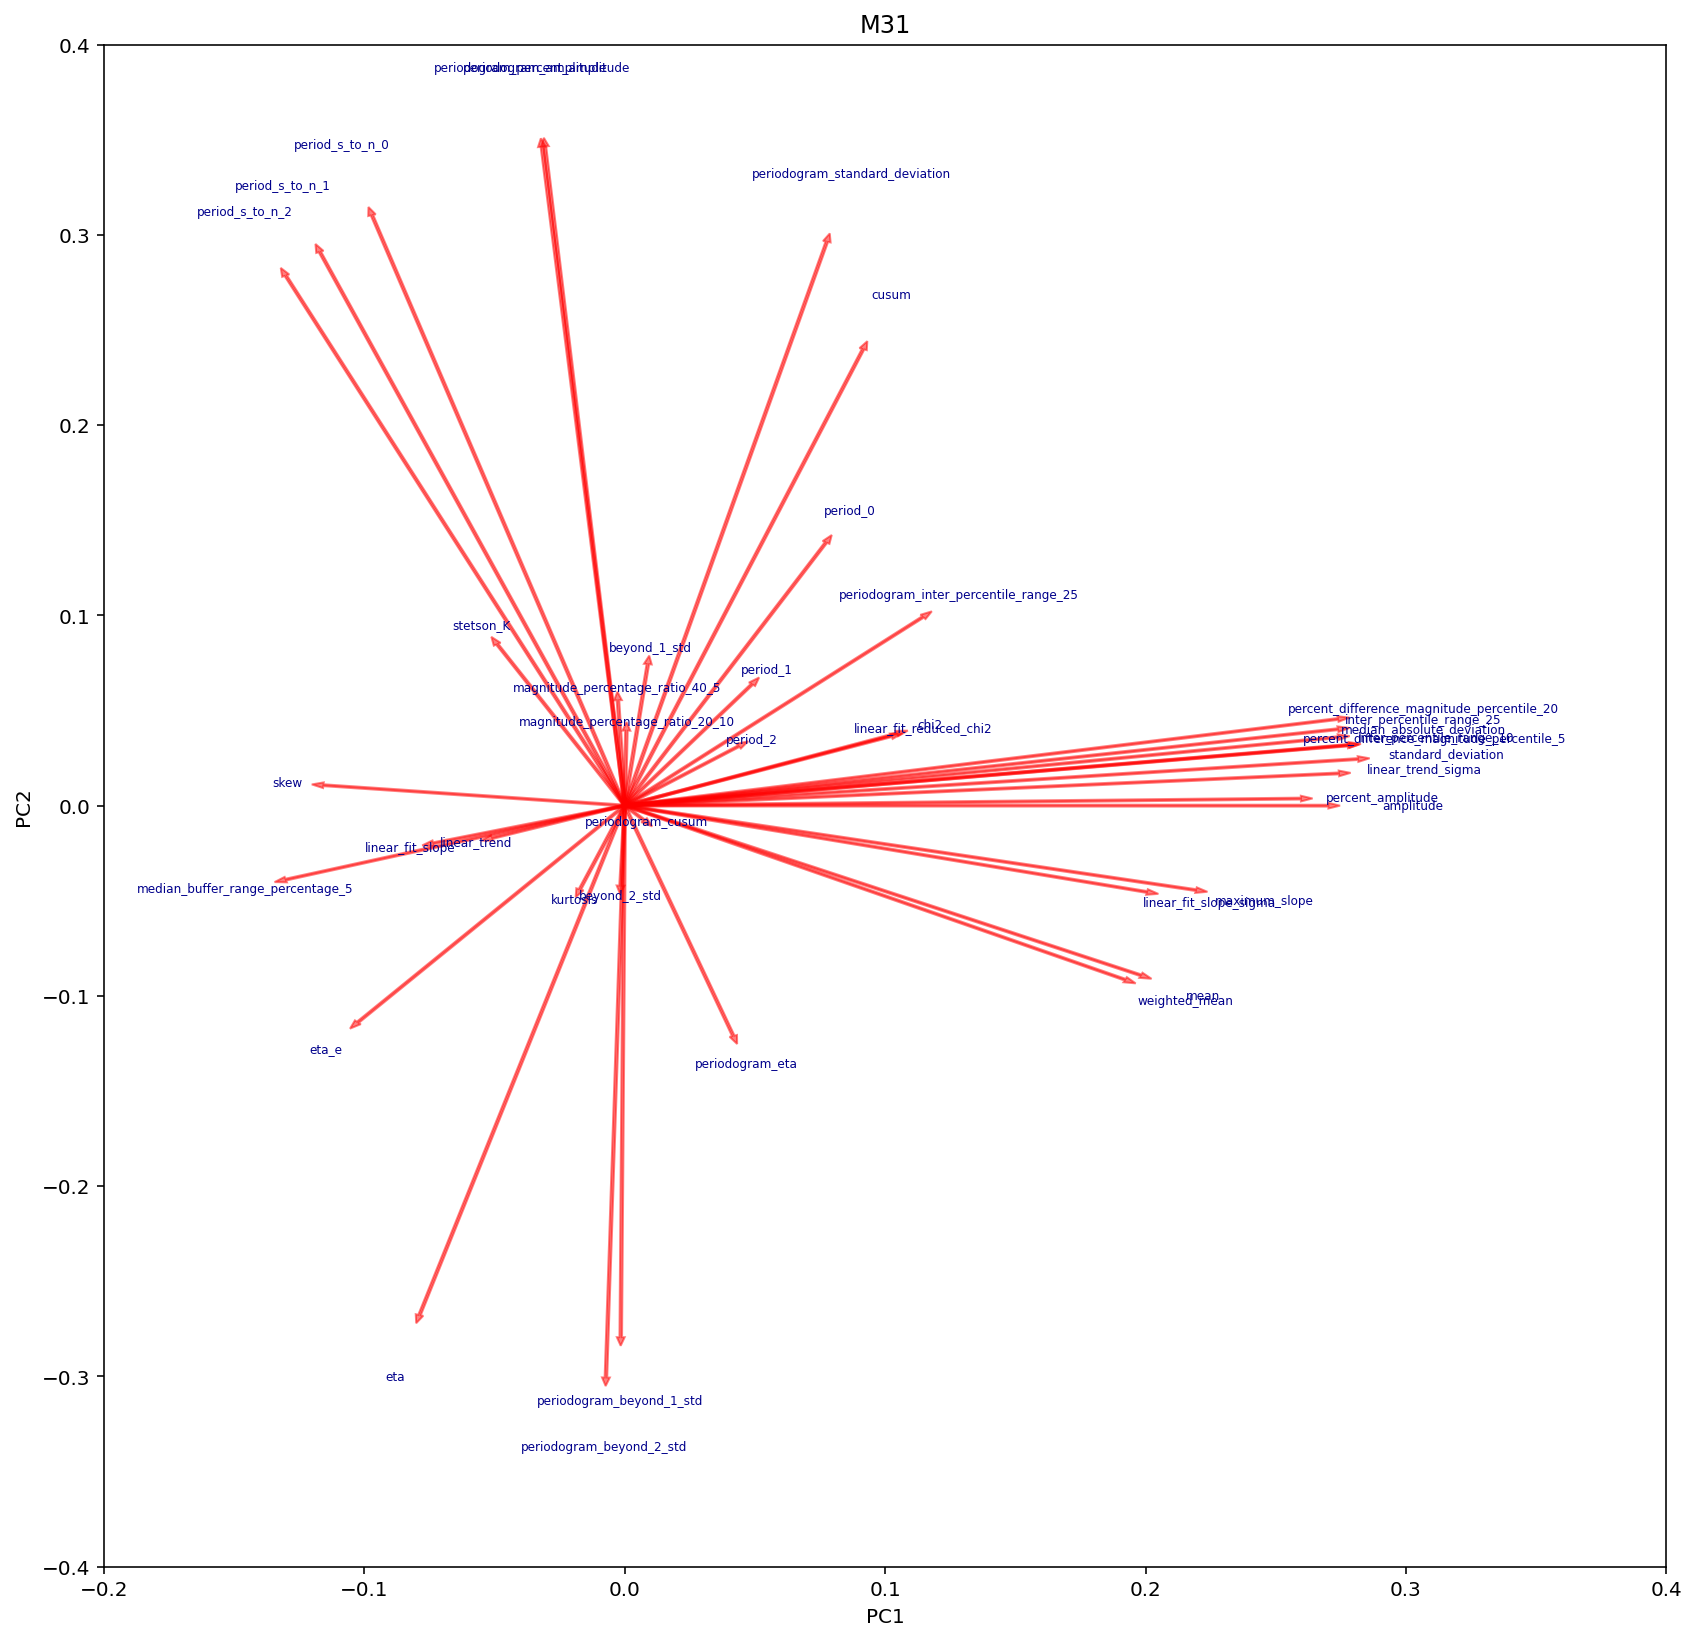

In [6]:
fig, ax = plt.subplots(figsize=(14, 14))

pca, x_new, score, coeff = applypca(m31)

plt.xlim(-0.2,0.4)
plt.ylim(-0.4,0.4)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("M31")

#Call the function. Use only the 2 PCs.
pcaplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), 'white') #just show components, not data
#plt.savefig('../figs/pca/m31_pca_importance.png', dpi=400, bbox_inches='tight') 

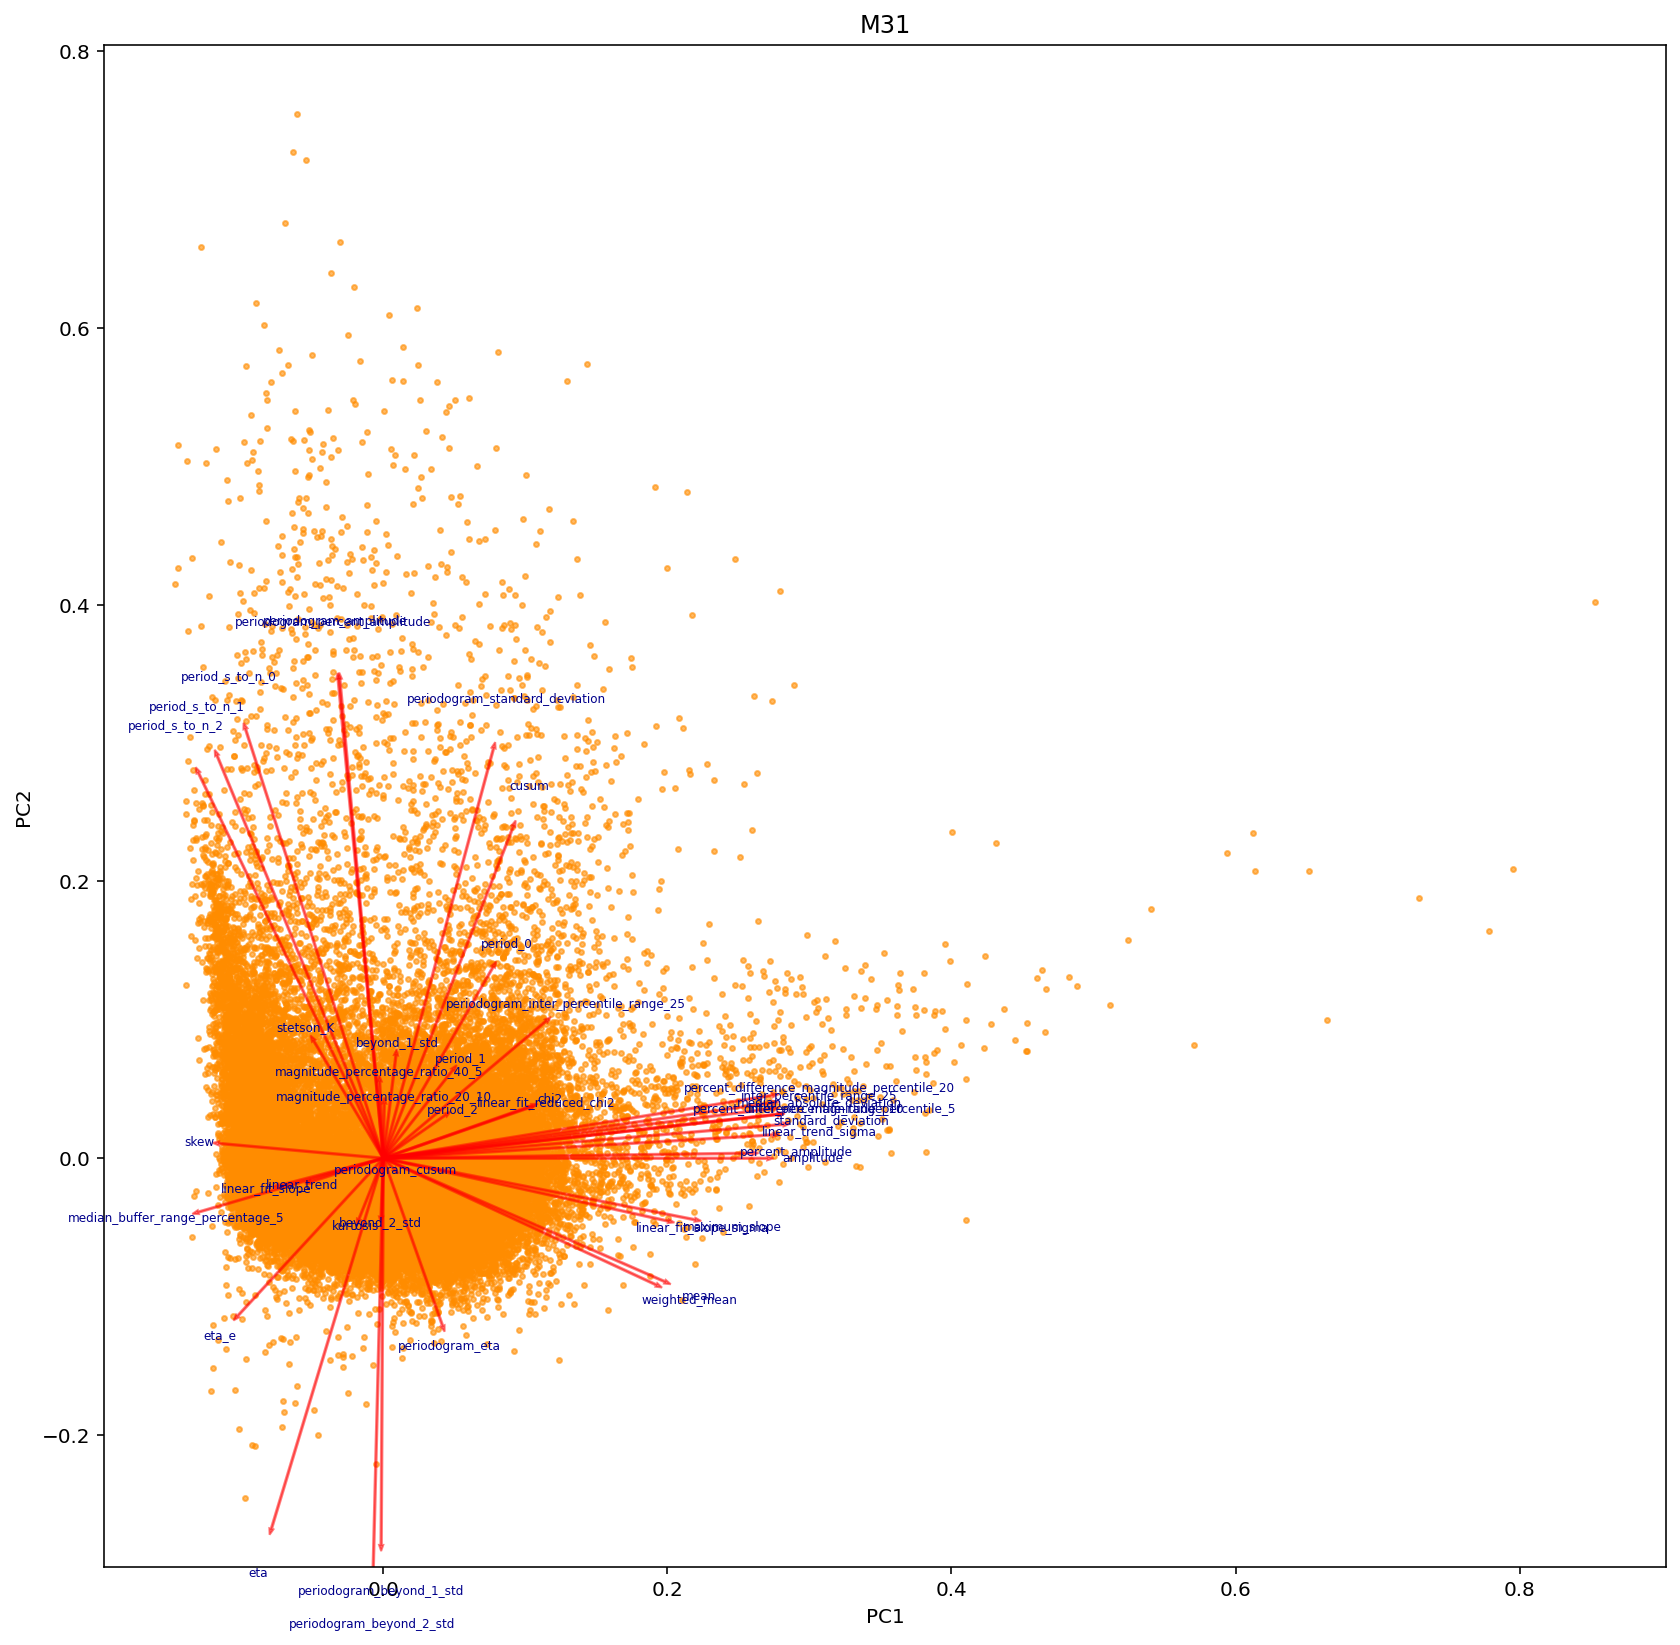

In [7]:
fig, ax = plt.subplots(figsize=(14, 14))
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("M31")

pcaplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), 'darkorange') 
#plt.savefig('../figs/pca/m31_pca_overlay_data.png', dpi=400, bbox_inches='tight') 

### Find variance of 42 principal components...

In [8]:
m31_pca_var_ratio = pca.explained_variance_ratio_
m31_pca_var_ratio

array([2.9282624e-01, 1.7764686e-01, 8.1576906e-02, 5.9318133e-02,
       4.5673586e-02, 3.8711138e-02, 3.5529505e-02, 2.6652120e-02,
       2.4116229e-02, 2.3249835e-02, 2.3104051e-02, 2.2038981e-02,
       1.8754052e-02, 1.8128498e-02, 1.7137550e-02, 1.3575229e-02,
       1.2608401e-02, 1.1598360e-02, 8.5148998e-03, 7.3589208e-03,
       7.0195072e-03, 5.7306495e-03, 4.8937360e-03, 4.4126213e-03,
       3.9169118e-03, 3.7042154e-03, 3.3586489e-03, 3.1325680e-03,
       1.8620116e-03, 9.9342316e-04, 6.8924855e-04, 6.3981506e-04,
       4.1580538e-04, 3.5827671e-04, 2.7329530e-04, 1.9533768e-04,
       1.0103920e-04, 8.3455627e-05, 5.7678477e-05, 4.0850806e-05,
       1.2683306e-06, 1.7554333e-07], dtype=float32)

In [9]:
np.cumsum(m31_pca_var_ratio)

array([0.29282624, 0.4704731 , 0.55205   , 0.6113681 , 0.6570417 ,
       0.69575286, 0.73128235, 0.75793445, 0.78205067, 0.8053005 ,
       0.82840455, 0.85044354, 0.8691976 , 0.8873261 , 0.90446365,
       0.9180389 , 0.9306473 , 0.94224566, 0.95076054, 0.95811945,
       0.965139  , 0.9708696 , 0.9757633 , 0.980176  , 0.9840929 ,
       0.9877971 , 0.99115574, 0.9942883 , 0.9961503 , 0.99714375,
       0.997833  , 0.9984728 , 0.9988886 , 0.9992469 , 0.9995202 ,
       0.9997155 , 0.99981654, 0.9999    , 0.9999577 , 0.9999985 ,
       0.99999976, 0.99999994], dtype=float32)

### PC1 explains 29.3% and PC2 17.8%. Together, if we keep PC1 and PC2 only, they explain 47.1%. Not bad for 42 features?

### Now let's find most important features mathematically

In [10]:
print(abs( pca.components_ )) #has shape (42, 42) [n_components, n_features]. 

[[2.70220488e-01 8.88836384e-03 1.59023702e-03 ... 2.81599462e-01
  4.89639118e-02 1.92176148e-01]
 [6.01112588e-05 7.43303746e-02 4.20616493e-02 ... 2.44465694e-02
  8.47878009e-02 9.15185809e-02]
 [7.63525069e-02 3.22336465e-01 4.04378176e-02 ... 6.62775291e-03
  2.72183478e-01 2.48516172e-01]
 ...
 [1.02007076e-01 9.12581943e-03 8.88882577e-03 ... 8.48711014e-01
  1.10803861e-02 2.53667608e-02]
 [1.14453901e-02 1.21582765e-04 1.12139620e-04 ... 4.61369008e-02
  3.50914616e-03 7.00042009e-01]
 [2.52861995e-04 3.97829681e-05 9.75814328e-06 ... 1.19953230e-03
  1.20662153e-04 2.63015926e-03]]


In [11]:
pca_num = []
for i in range(1, 43):
    pca_num.append('PCA{}'.format(i))

m31_pca_comp = pd.DataFrame(pca.components_, index=pca_num, columns=m31_names)
#m31_pca_comp.to_csv('../data/m31_pca_feature_importance.csv')
m31_pca_comp

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
PCA1,0.270220,0.008888,-0.001590,0.091567,-0.078800,-0.102478,0.273897,0.278250,-0.017195,-0.073426,...,0.007447,0.041709,0.114543,0.077620,-0.031790,0.104492,-0.115696,0.281599,-0.048964,0.192176
PCA2,-0.000060,0.074330,-0.042062,0.239880,-0.267781,-0.113904,0.040137,0.031887,-0.044017,-0.019775,...,-0.007698,-0.121068,0.099130,0.296348,0.346211,0.037850,0.010693,0.024447,0.084788,-0.091519
PCA3,0.076353,-0.322336,0.040438,0.009092,-0.037840,-0.032995,-0.062708,-0.036987,0.241820,-0.264892,...,0.114642,0.069852,0.019305,-0.040777,-0.022052,0.347273,-0.039459,0.006628,-0.272183,-0.248516
PCA4,-0.053699,0.324534,-0.126995,-0.106357,0.157180,0.160718,0.081438,0.040464,-0.211928,0.006079,...,-0.101264,-0.080606,-0.130911,-0.094907,-0.037241,0.331369,0.112065,0.015037,0.393288,-0.160194
PCA5,0.114042,-0.190602,0.001752,-0.235740,0.231478,0.235326,0.023916,0.031950,0.191424,0.212244,...,-0.269133,-0.074913,-0.373341,-0.177580,0.104772,0.055025,0.035645,0.049430,-0.195764,0.144635
PCA6,0.026341,-0.110977,-0.380974,0.061750,-0.084515,-0.185655,0.021447,-0.019344,0.415640,0.390316,...,0.168372,-0.146539,0.108881,0.090557,-0.021491,0.050218,0.201816,-0.003943,-0.148721,-0.095493
PCA7,-0.051217,0.002529,0.427992,0.075854,-0.062889,-0.065425,-0.029443,0.021045,-0.256978,0.410174,...,0.016073,-0.047112,0.096075,0.077805,-0.040946,0.165902,-0.023760,0.001783,0.104607,-0.063377
PCA8,0.003550,0.014802,0.115546,-0.039661,-0.031105,0.108727,0.030318,0.040312,0.071309,-0.090170,...,0.502621,-0.613671,-0.243585,-0.024858,-0.057870,-0.073713,0.209216,0.026488,0.060294,-0.044928
PCA9,-0.028840,-0.021959,0.135525,-0.028702,0.015588,0.000430,0.027211,0.045393,0.205811,-0.114746,...,-0.179314,-0.141795,0.168532,0.081884,0.016256,-0.056148,0.584243,0.023129,0.162121,-0.002490
PCA10,-0.017144,-0.007181,0.059180,0.247308,0.010283,0.297033,0.017831,0.020512,0.142356,0.015373,...,-0.034610,0.258497,-0.001064,-0.058553,0.000339,-0.039041,0.411627,0.011375,0.148134,0.021789


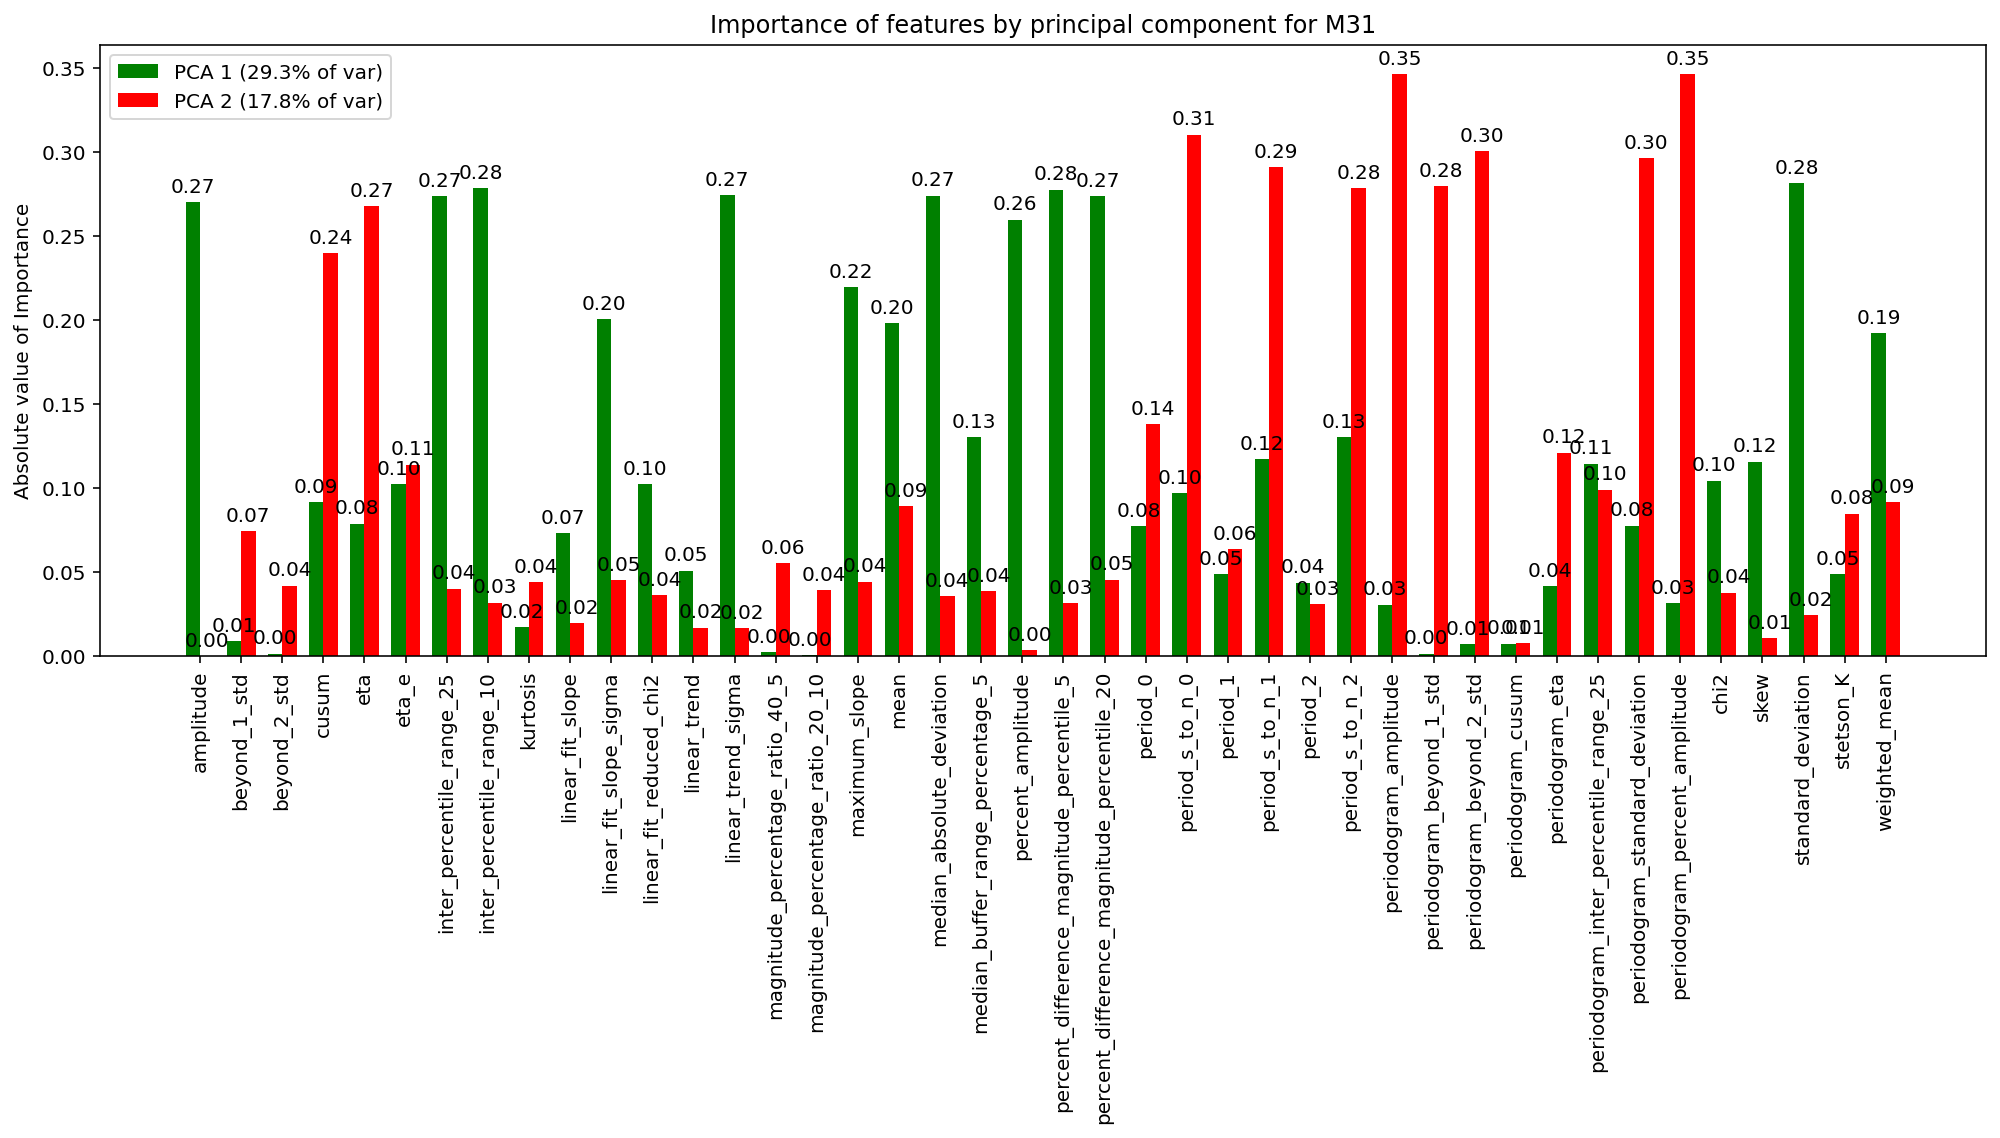

In [12]:
labels = m31_names
pca1 = abs(np.array(m31_pca_comp.loc[['PCA1']])[0])
pca2 = abs(np.array(m31_pca_comp.loc[['PCA2']])[0])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, pca1, width, label='PCA 1 (29.3% of var)', color='g')
rects2 = ax.bar(x + width/2, pca2, width, label='PCA 2 (17.8% of var)', color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Absolute value of Importance')
ax.set_title('Importance of features by principal component for M31')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend(loc='upper left')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#plt.savefig('../figs/pca/m31_pca_barchart.png', dpi=400, bbox_inches='tight') 

In [13]:
m31_pca_comp.loc[['PCA1']] #most important principal component (remember 29.3% variance)

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
PCA1,0.27022,0.008888,-0.00159,0.091567,-0.0788,-0.102478,0.273897,0.27825,-0.017195,-0.073426,...,0.007447,0.041709,0.114543,0.07762,-0.03179,0.104492,-0.115696,0.281599,-0.048964,0.192176


In [14]:
ordered_m31_pca1 = OrderedDict(sorted(m31_pca_comp.loc[['PCA1']].items(), key=lambda item:np.max(item[1])))
for key, value in ordered_m31_pca1.items():
    print(key, value)

period_s_to_n_2 PCA1   -0.130181
Name: period_s_to_n_2, dtype: float32
median_buffer_range_percentage_5 PCA1   -0.130151
Name: median_buffer_range_percentage_5, dtype: float32
period_s_to_n_1 PCA1   -0.11707
Name: period_s_to_n_1, dtype: float32
skew PCA1   -0.115696
Name: skew, dtype: float32
eta_e PCA1   -0.102478
Name: eta_e, dtype: float32
period_s_to_n_0 PCA1   -0.097057
Name: period_s_to_n_0, dtype: float32
eta PCA1   -0.0788
Name: eta, dtype: float32
linear_fit_slope PCA1   -0.073426
Name: linear_fit_slope, dtype: float32
linear_trend PCA1   -0.050854
Name: linear_trend, dtype: float32
stetson_K PCA1   -0.048964
Name: stetson_K, dtype: float32
periodogram_percent_amplitude PCA1   -0.03179
Name: periodogram_percent_amplitude, dtype: float32
periodogram_amplitude PCA1   -0.030639
Name: periodogram_amplitude, dtype: float32
kurtosis PCA1   -0.017195
Name: kurtosis, dtype: float32
periodogram_beyond_2_std PCA1   -0.007211
Name: periodogram_beyond_2_std, dtype: float32
magnitude_perc

# ABOVE IS ORDERED LEAST IMPORTANT - MOST IMPORTANT FEATURES IN 1ST PRINCIPAL COMPONENT (29.3% var)

### Thus, by looking at the PC1 (First Principal Component) which is the first row in pca_feature_importance.csv...
### we can conclude that standard_deviation,  inter_percentile_range_10, percent_difference_magnitude_percentile_5, linear_trend_sigma, median_absolute_deviation, are the most important.

# FOR SECOND PRINCIPAL COMPONENT (17.8% var), we find...

In [15]:
ordered_m31_pca2 = OrderedDict(sorted(m31_pca_comp.loc[['PCA2']].items(), key=lambda item:np.max(item[1])))
for key, value in ordered_m31_pca2.items():
    print(key, value)

periodogram_beyond_2_std PCA2   -0.300604
Name: periodogram_beyond_2_std, dtype: float32
periodogram_beyond_1_std PCA2   -0.279435
Name: periodogram_beyond_1_std, dtype: float32
eta PCA2   -0.267781
Name: eta, dtype: float32
periodogram_eta PCA2   -0.121068
Name: periodogram_eta, dtype: float32
eta_e PCA2   -0.113904
Name: eta_e, dtype: float32
weighted_mean PCA2   -0.091519
Name: weighted_mean, dtype: float32
mean PCA2   -0.089205
Name: mean, dtype: float32
linear_fit_slope_sigma PCA2   -0.04543
Name: linear_fit_slope_sigma, dtype: float32
maximum_slope PCA2   -0.044441
Name: maximum_slope, dtype: float32
kurtosis PCA2   -0.044017
Name: kurtosis, dtype: float32
beyond_2_std PCA2   -0.042062
Name: beyond_2_std, dtype: float32
median_buffer_range_percentage_5 PCA2   -0.038928
Name: median_buffer_range_percentage_5, dtype: float32
linear_fit_slope PCA2   -0.019775
Name: linear_fit_slope, dtype: float32
linear_trend PCA2   -0.017034
Name: linear_trend, dtype: float32
periodogram_cusum PCA

### Thus, by looking at the PC2 (2nd Principal Component) which is the second row in pca_feature_importance.csv...
### we can conclude that periodogram_amplitude, periodogram_percent_amplitude, period_s_to_n_0, periodogram_standard_deviation, period_s_to_n_1 are the most important.

### 3rd PC

In [16]:
ordered_m31_pca1 = OrderedDict(sorted(m31_pca_comp.loc[['PCA3']].items(), key=lambda item:np.max(item[1])))
for key, value in ordered_m31_pca1.items():
    print(key, value)

beyond_1_std PCA3   -0.322336
Name: beyond_1_std, dtype: float32
median_buffer_range_percentage_5 PCA3   -0.283504
Name: median_buffer_range_percentage_5, dtype: float32
stetson_K PCA3   -0.272183
Name: stetson_K, dtype: float32
linear_fit_slope PCA3   -0.264892
Name: linear_fit_slope, dtype: float32
linear_fit_slope_sigma PCA3   -0.262888
Name: linear_fit_slope_sigma, dtype: float32
weighted_mean PCA3   -0.248516
Name: weighted_mean, dtype: float32
mean PCA3   -0.240167
Name: mean, dtype: float32
linear_trend PCA3   -0.224903
Name: linear_trend, dtype: float32
magnitude_percentage_ratio_40_5 PCA3   -0.177742
Name: magnitude_percentage_ratio_40_5, dtype: float32
magnitude_percentage_ratio_20_10 PCA3   -0.152462
Name: magnitude_percentage_ratio_20_10, dtype: float32
median_absolute_deviation PCA3   -0.069924
Name: median_absolute_deviation, dtype: float32
inter_percentile_range_25 PCA3   -0.062708
Name: inter_percentile_range_25, dtype: float32
maximum_slope PCA3   -0.048859
Name: maxim

# DISK

In [17]:
# DISK
disk_oid = np.memmap('../data/oid_disk.dat', mode='r', dtype=np.uint64)
disk_names = open('../data/feature_disk.name').read().split()
disk_x = np.memmap('../data/feature_disk.dat', mode='r', dtype=np.float32, shape=(disk_oid.size, len(disk_names)))

In [18]:
disk = pd.DataFrame(disk_x, index=disk_oid, columns=disk_names)
disk

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
807216300041250,0.370500,0.294828,0.055172,0.059051,2.035710,4.324502e+11,0.131500,0.256500,0.560421,-0.000141,...,0.193735,0.019562,0.656306,0.772382,8.776011,1.653118,0.239919,0.103299,0.778457,19.047564
807216300004675,0.366500,0.303030,0.044657,0.047631,2.088702,4.230982e+11,0.150501,0.286200,0.176171,-0.000165,...,0.155171,0.023204,0.648063,0.742648,8.712999,1.459253,0.251311,0.114242,0.803487,19.250351
807216300006368,0.352500,0.316770,0.052795,0.039514,2.060871,4.241239e+11,0.144501,0.266199,0.288710,-0.000204,...,0.152846,0.022364,0.679952,0.643210,6.947167,1.555116,0.241078,0.110432,0.790517,19.168779
807216300007936,0.076500,0.256975,0.042584,0.166819,1.589441,2.227283e+11,0.018000,0.035400,4.314334,-0.000122,...,0.128832,0.027912,0.707155,1.412706,54.132122,2.081866,0.952919,0.015871,0.731919,15.379960
807216300005656,0.272000,0.307810,0.041348,0.103563,1.808017,3.770301e+11,0.118250,0.230200,0.278995,-0.000120,...,0.170926,0.016058,0.734269,1.178830,20.001444,1.367357,0.503628,0.090566,0.794674,18.977293
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
807201400043063,0.134999,0.261194,0.052239,0.074626,1.939203,3.478263e+11,0.038000,0.090500,1.905449,0.000004,...,0.204491,0.024706,0.661476,0.982081,14.566538,8.745687,-0.273337,0.037209,0.726424,16.256903
807201300057959,0.354500,0.315789,0.044892,0.068742,2.002020,3.240108e+11,0.130999,0.260000,0.215598,-0.000283,...,0.159282,0.024428,0.763629,0.731055,7.406523,1.563799,-0.021221,0.100870,0.791641,19.259731
807201300060502,0.355000,0.294753,0.050926,0.045662,1.968179,3.700885e+11,0.129000,0.260000,0.810251,0.000067,...,0.154592,0.041831,0.691424,0.706343,6.929576,1.593399,-0.093009,0.102527,0.761554,19.280340
807201400031737,0.217500,0.282511,0.043348,0.043773,1.984369,4.224671e+11,0.075249,0.151600,0.663024,-0.000127,...,0.169853,0.021363,0.733726,0.743227,7.366379,1.184451,0.327773,0.059975,0.778571,18.675014


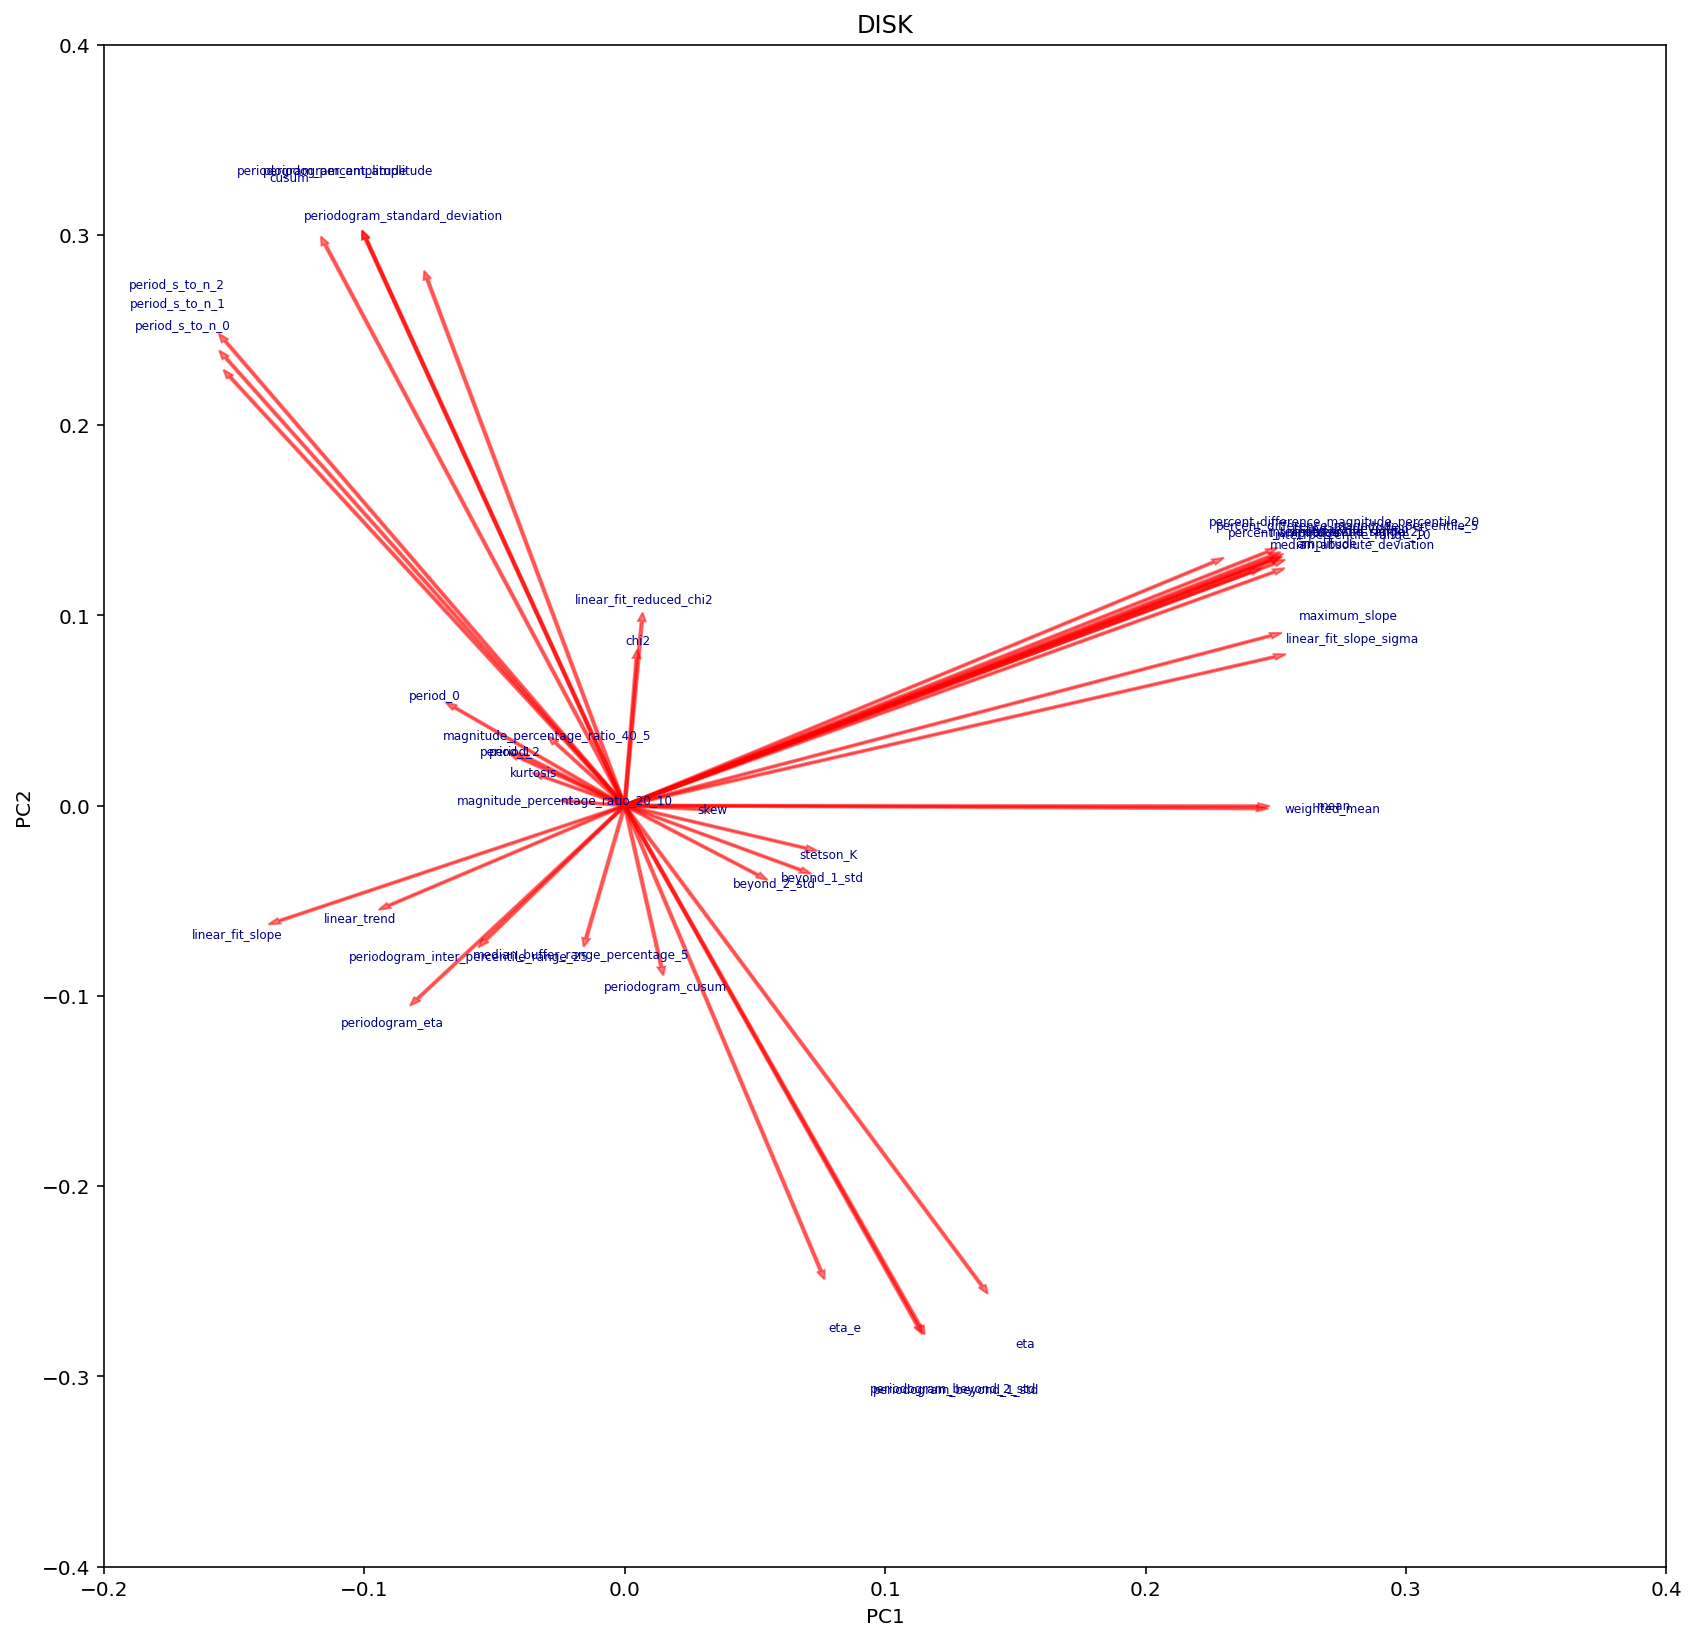

In [19]:
fig, ax = plt.subplots(figsize=(14, 14))

pca, x_new, score, coeff = applypca(disk) #apply DISK field

plt.xlim(-0.2,0.4)
plt.ylim(-0.4,0.4)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("DISK")

#Call the function. Use only the 2 PCs.
pcaplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), 'white') #just show components, not data
#plt.savefig('../figs/pca/disk_pca_importance.png', dpi=400, bbox_inches='tight') 

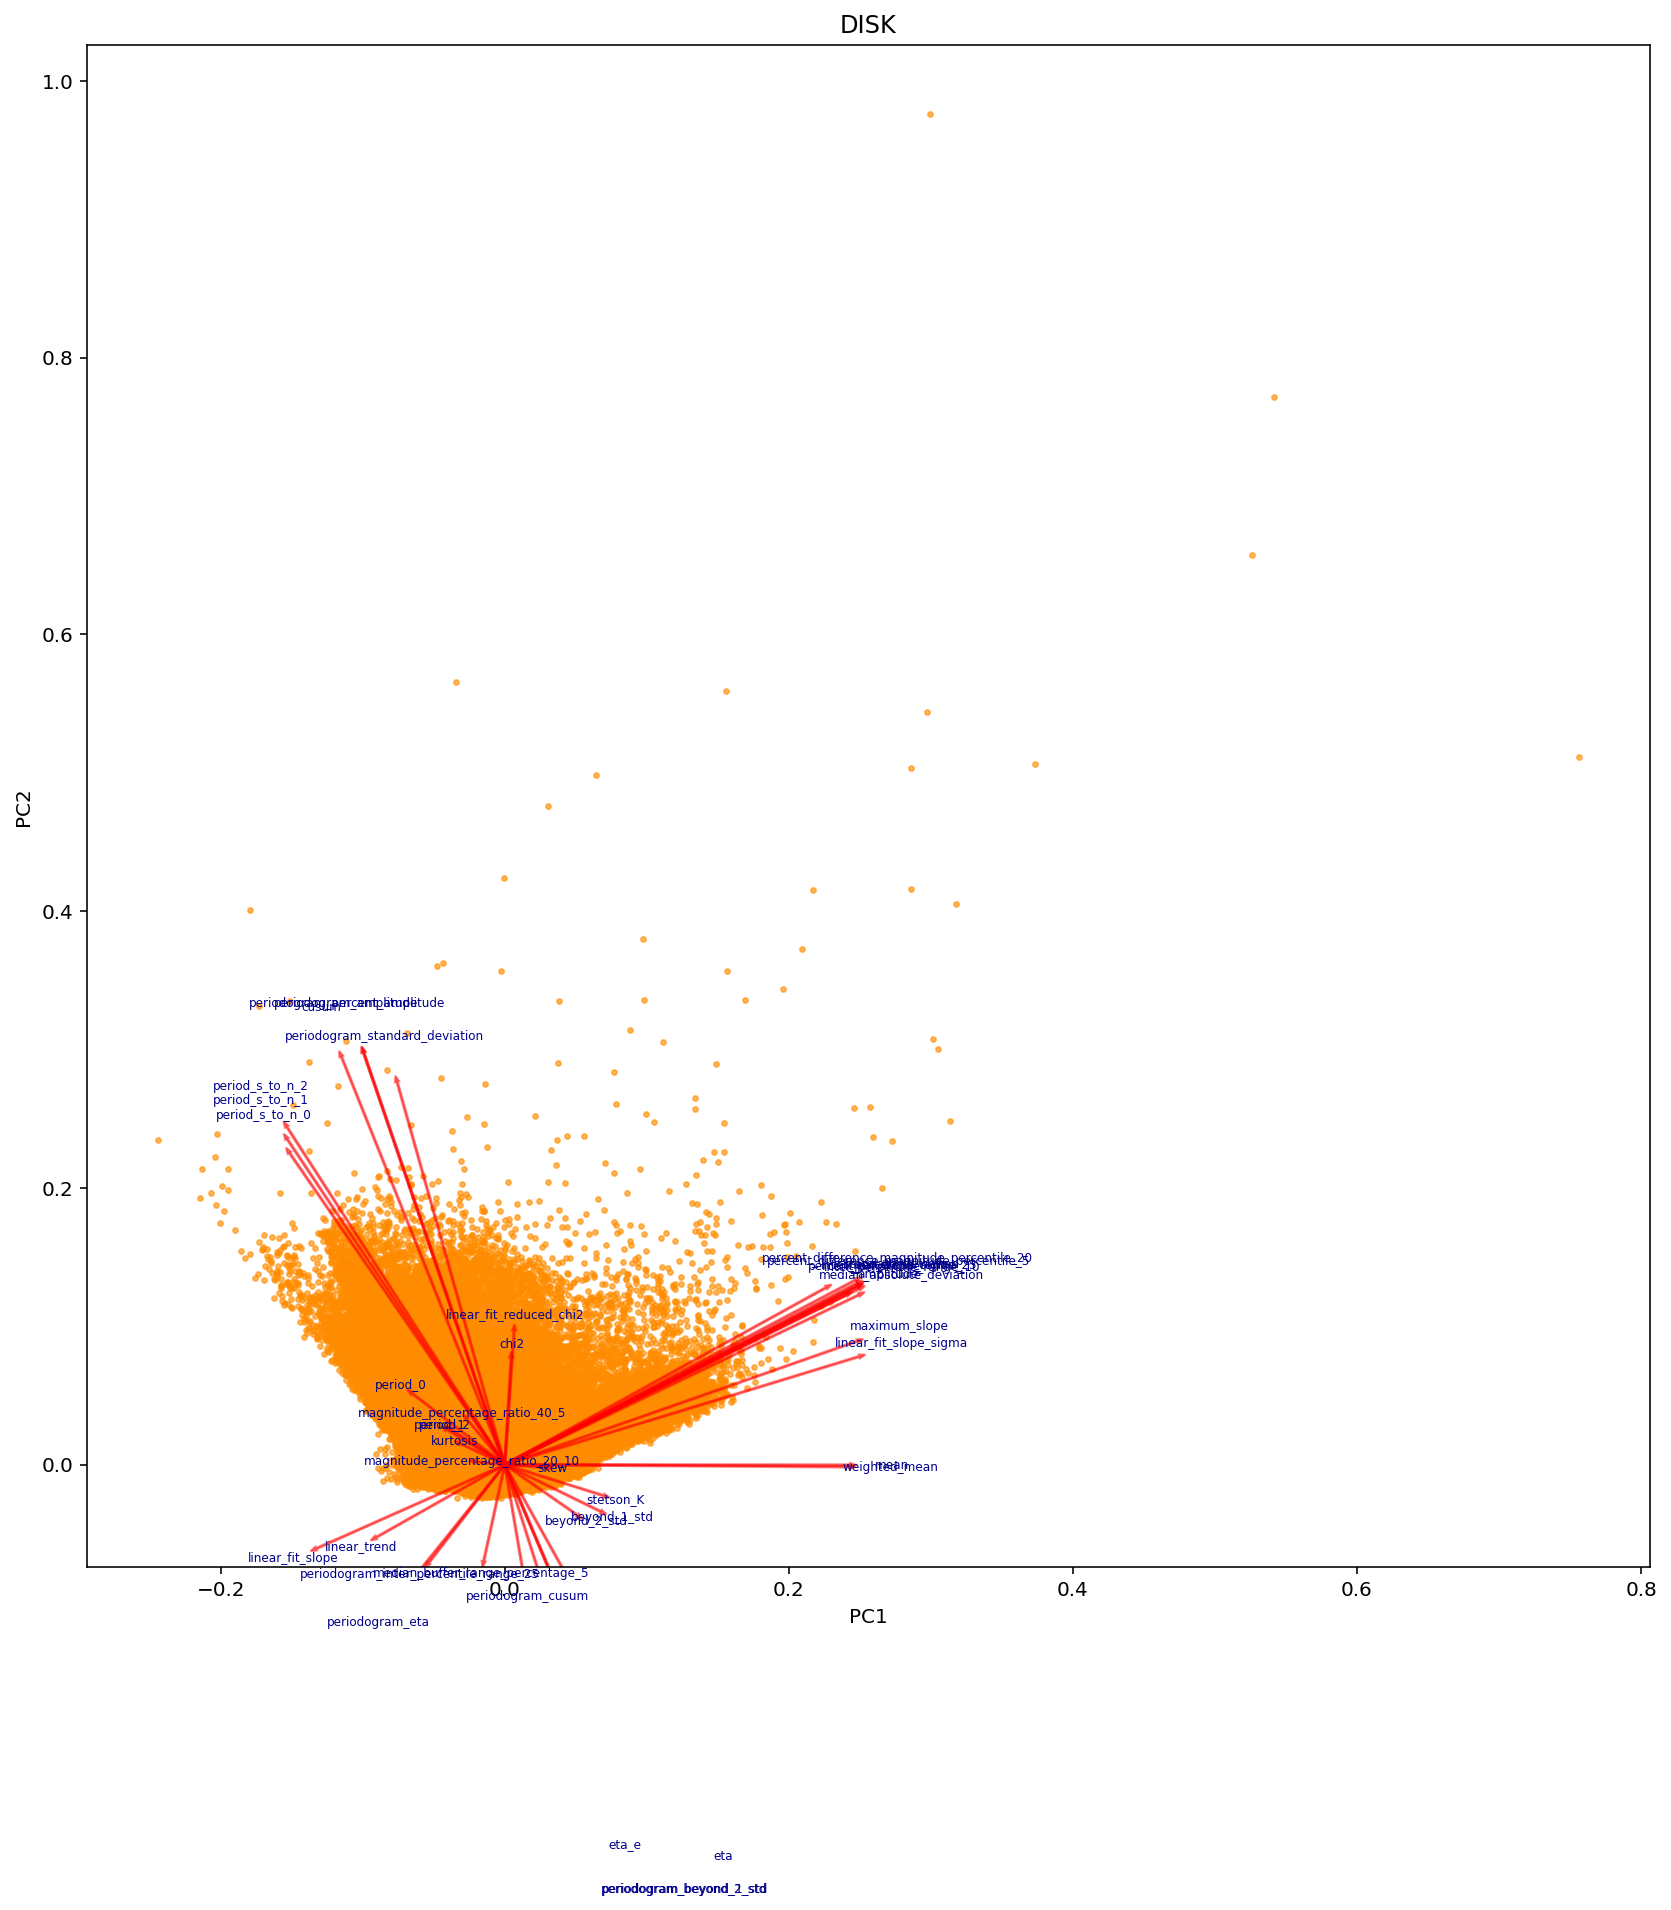

In [20]:
fig, ax = plt.subplots(figsize=(14, 14))
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("DISK")

pcaplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), 'darkorange') 
#plt.savefig('../figs/pca/disk_pca_overlay_data.png', dpi=400, bbox_inches='tight') 

In [21]:
disk_pca_var_ratio = pca.explained_variance_ratio_
disk_pca_var_ratio

array([3.30243754e-01, 1.71544391e-01, 7.60493006e-02, 5.18341272e-02,
       4.42003375e-02, 4.33271063e-02, 3.48041088e-02, 2.97722478e-02,
       2.46489335e-02, 2.32871078e-02, 2.18472874e-02, 2.08234802e-02,
       1.88368236e-02, 1.46515528e-02, 1.33906995e-02, 1.31082127e-02,
       1.26431818e-02, 1.02635468e-02, 8.50527563e-03, 6.67313759e-03,
       5.67093795e-03, 4.52080435e-03, 3.95706905e-03, 3.42818513e-03,
       2.97480215e-03, 2.03388978e-03, 1.93743825e-03, 1.18908135e-03,
       1.03840753e-03, 9.96852284e-04, 4.92882867e-04, 4.01221758e-04,
       2.62222107e-04, 2.00544302e-04, 1.63934052e-04, 1.09356880e-04,
       8.25847751e-05, 3.84569844e-05, 2.94954493e-05, 1.71215415e-05,
       9.11665012e-08, 7.85825298e-09])

In [22]:
np.cumsum(disk_pca_var_ratio)

array([0.33024375, 0.50178814, 0.57783745, 0.62967157, 0.67387191,
       0.71719902, 0.75200313, 0.78177537, 0.80642431, 0.82971141,
       0.8515587 , 0.87238218, 0.89121901, 0.90587056, 0.91926126,
       0.93236947, 0.94501265, 0.9552762 , 0.96378147, 0.97045461,
       0.97612555, 0.98064635, 0.98460342, 0.98803161, 0.99100641,
       0.9930403 , 0.99497774, 0.99616682, 0.99720523, 0.99820208,
       0.99869496, 0.99909618, 0.99935841, 0.99955895, 0.99972289,
       0.99983224, 0.99991483, 0.99995328, 0.99998278, 0.9999999 ,
       0.99999999, 1.        ])

### PC1 explains 33.0% and PC2 17.2% of variance. Together, if we keep PC1 and PC2 only, they explain 50.2%. 

In [23]:
print(abs( pca.components_ )) #has shape (42, 42) [n_components, n_features]. 

[[2.40640506e-01 6.76635504e-02 5.11589646e-02 ... 2.48953044e-01
  6.96978644e-02 2.42666930e-01]
 [1.22834064e-01 3.38873416e-02 3.64881754e-02 ... 1.30213022e-01
  2.24334709e-02 1.57322909e-03]
 [1.10667907e-01 4.40623730e-01 2.15234458e-02 ... 4.65435274e-02
  4.64297146e-01 8.49625915e-02]
 ...
 [2.60194968e-02 4.48442576e-03 2.85762688e-03 ... 7.90706158e-01
  1.65004581e-02 1.25783104e-02]
 [7.65001110e-04 4.08623135e-04 1.88915816e-04 ... 1.41352713e-02
  3.61874700e-04 7.04173505e-01]
 [6.62038583e-05 1.84123455e-05 5.32308968e-06 ... 2.67438591e-04
  1.95056200e-05 4.15108353e-03]]


In [24]:
pca_num = []
for i in range(1, 43):
    pca_num.append('PCA{}'.format(i))

disk_pca_comp = pd.DataFrame(pca.components_, index=pca_num, columns=disk_names)
#disk_pca_comp.to_csv('../data/disk_pca_feature_importance.csv')
disk_pca_comp

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
PCA1,0.240641,0.067664,0.051159,-0.115029,0.137302,0.075372,0.248003,0.249652,-0.031399,-0.132705,...,0.014084,-0.079665,-0.053486,-0.075832,-0.099372,0.004554,0.029942,0.248953,0.069698,0.242667
PCA2,0.122834,-0.033887,-0.036488,0.294892,-0.252656,-0.244697,0.128756,0.127219,0.015257,-0.060617,...,-0.084805,-0.101684,-0.070917,0.276726,0.297989,0.077459,-0.002049,0.130213,-0.022433,-0.001573
PCA3,0.110668,-0.440624,0.021523,-0.032994,-0.048265,-0.196781,0.005286,0.028598,0.308892,-0.033628,...,0.096934,0.203207,0.209245,-0.185627,-0.143603,0.064536,-0.091605,0.046544,-0.464297,-0.084963
PCA4,0.000494,-0.002268,-0.073268,-0.059571,0.005476,0.065601,-0.014987,-0.004225,0.065093,0.161278,...,0.008447,0.011321,-0.067701,0.077782,0.047622,0.551772,-0.047553,0.005017,-0.010306,-0.022813
PCA5,-0.057242,0.174753,-0.039261,0.049704,-0.034902,-0.115325,0.014649,0.009976,-0.164154,-0.448059,...,0.129398,0.199709,0.219406,-0.145979,-0.097172,0.138034,0.091447,-0.000318,0.203978,-0.099504
PCA6,-0.052052,0.026644,0.520149,-0.001366,0.024414,0.144256,-0.027831,0.011104,-0.391716,0.052947,...,0.011393,-0.206131,0.026194,-0.117807,-0.069435,0.138908,0.213843,0.005031,0.145054,0.024405
PCA7,0.000641,-0.010174,-0.042834,-0.073012,0.296996,0.234968,-0.022913,-0.018516,0.111184,-0.061087,...,-0.570779,0.250415,-0.491595,-0.123302,-0.011683,0.041699,-0.034945,-0.016387,-0.047450,0.089390
PCA8,-0.058006,-0.143728,0.120051,0.010825,-0.008915,0.009628,-0.077229,-0.050950,0.102136,-0.416295,...,-0.088800,-0.079826,-0.226489,0.201895,0.123057,-0.014219,0.110834,-0.051049,-0.112473,-0.050104
PCA9,0.002833,0.056718,-0.051131,-0.011987,0.080884,0.054448,-0.001808,-0.005495,0.012896,-0.037137,...,-0.058358,-0.131013,0.103630,-0.177863,-0.149497,0.041703,-0.237385,-0.005505,-0.008996,0.013492
PCA10,-0.007350,0.079928,-0.052378,-0.006122,0.080461,0.119500,-0.023525,-0.022095,0.070454,-0.104252,...,0.032126,-0.311276,0.119936,-0.170156,-0.154859,0.047062,-0.461035,-0.022598,-0.047959,0.038239


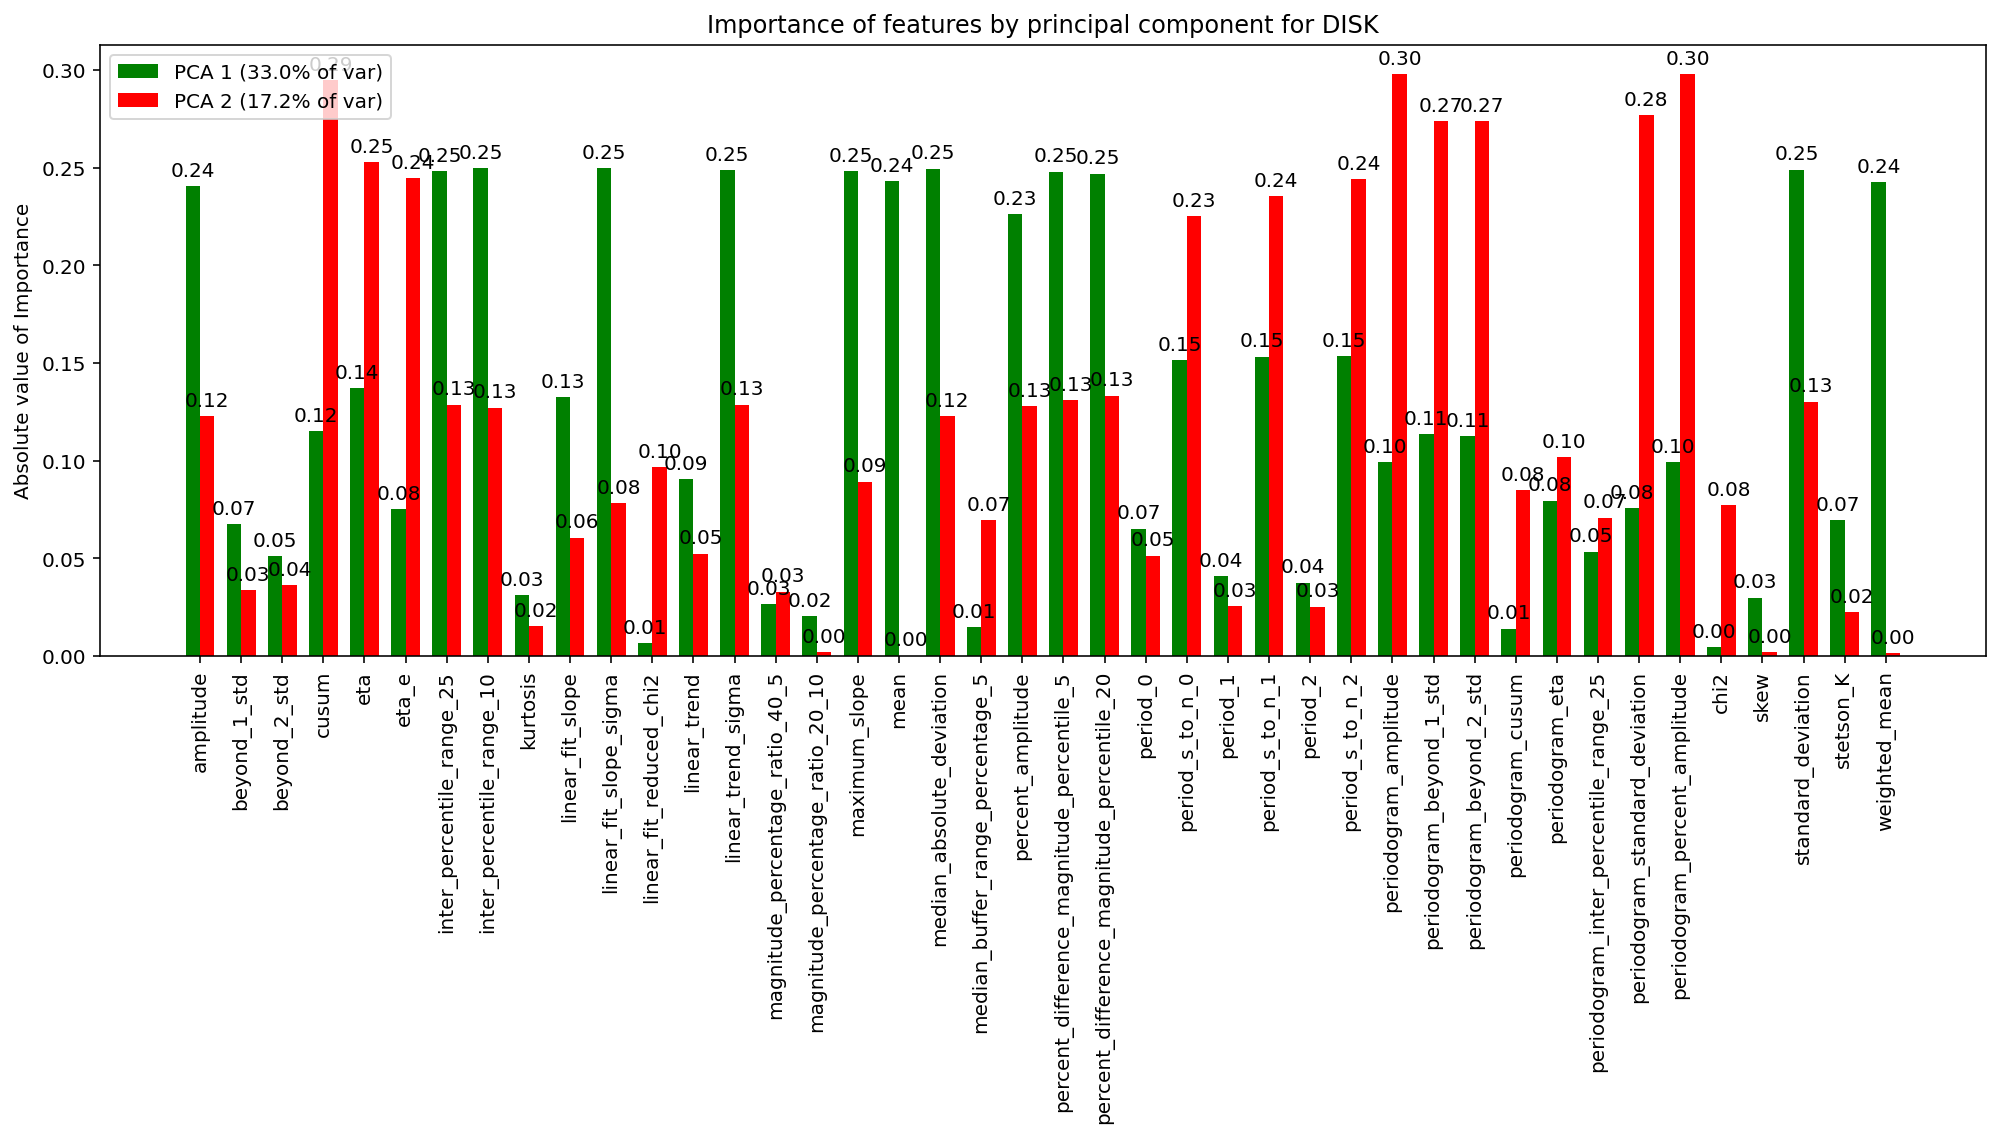

In [25]:
labels = disk_names
pca1 = abs(np.array(disk_pca_comp.loc[['PCA1']])[0])
pca2 = abs(np.array(disk_pca_comp.loc[['PCA2']])[0])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, pca1, width, label='PCA 1 (33.0% of var)', color='g')
rects2 = ax.bar(x + width/2, pca2, width, label='PCA 2 (17.2% of var)', color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Absolute value of Importance')
ax.set_title('Importance of features by principal component for DISK')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend(loc='upper left')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#plt.savefig('../figs/pca/disk_pca_barchart.png', dpi=400, bbox_inches='tight') 

## DISK PCA1

In [26]:
disk_pca_comp.loc[['PCA1']] #most important principal component (remember 33.0% variance)

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
PCA1,0.240641,0.067664,0.051159,-0.115029,0.137302,0.075372,0.248003,0.249652,-0.031399,-0.132705,...,0.014084,-0.079665,-0.053486,-0.075832,-0.099372,0.004554,0.029942,0.248953,0.069698,0.242667


In [27]:
ordered_disk_pca1 = OrderedDict(sorted(disk_pca_comp.loc[['PCA1']].items(), key=lambda item:np.max(item[1])))
for key, value in ordered_disk_pca1.items():
    print(key, value)

period_s_to_n_2 PCA1   -0.153468
Name: period_s_to_n_2, dtype: float32
period_s_to_n_1 PCA1   -0.153266
Name: period_s_to_n_1, dtype: float32
period_s_to_n_0 PCA1   -0.151558
Name: period_s_to_n_0, dtype: float32
linear_fit_slope PCA1   -0.132705
Name: linear_fit_slope, dtype: float32
cusum PCA1   -0.115029
Name: cusum, dtype: float32
periodogram_amplitude PCA1   -0.099479
Name: periodogram_amplitude, dtype: float32
periodogram_percent_amplitude PCA1   -0.099372
Name: periodogram_percent_amplitude, dtype: float32
linear_trend PCA1   -0.090612
Name: linear_trend, dtype: float32
periodogram_eta PCA1   -0.079665
Name: periodogram_eta, dtype: float32
periodogram_standard_deviation PCA1   -0.075832
Name: periodogram_standard_deviation, dtype: float32
period_0 PCA1   -0.065251
Name: period_0, dtype: float32
periodogram_inter_percentile_range_25 PCA1   -0.053486
Name: periodogram_inter_percentile_range_25, dtype: float32
period_1 PCA1   -0.040894
Name: period_1, dtype: float32
period_2 PCA1  

### most imporant features for PCA1: inter_percentile_range_10, linear_fit_slope_sigma, median_absolute_deviation, standard_deviation, linear_trend_sigma

## DISK PCA2

In [28]:
ordered_disk_pca2 = OrderedDict(sorted(disk_pca_comp.loc[['PCA2']].items(), key=lambda item:np.max(item[1])))
for key, value in ordered_disk_pca2.items():
    print(key, value)

periodogram_beyond_1_std PCA2   -0.273865
Name: periodogram_beyond_1_std, dtype: float32
periodogram_beyond_2_std PCA2   -0.273664
Name: periodogram_beyond_2_std, dtype: float32
eta PCA2   -0.252656
Name: eta, dtype: float32
eta_e PCA2   -0.244697
Name: eta_e, dtype: float32
periodogram_eta PCA2   -0.101684
Name: periodogram_eta, dtype: float32
periodogram_cusum PCA2   -0.084805
Name: periodogram_cusum, dtype: float32
periodogram_inter_percentile_range_25 PCA2   -0.070917
Name: periodogram_inter_percentile_range_25, dtype: float32
median_buffer_range_percentage_5 PCA2   -0.06979
Name: median_buffer_range_percentage_5, dtype: float32
linear_fit_slope PCA2   -0.060617
Name: linear_fit_slope, dtype: float32
linear_trend PCA2   -0.052556
Name: linear_trend, dtype: float32
beyond_2_std PCA2   -0.036488
Name: beyond_2_std, dtype: float32
beyond_1_std PCA2   -0.033887
Name: beyond_1_std, dtype: float32
stetson_K PCA2   -0.022433
Name: stetson_K, dtype: float32
skew PCA2   -0.002049
Name: skew

### most important features for PCA2: periodogram_amplitude, periodogram_percent_amplitude, cusum, periodogram_standard_deviation, period_s_to_n_2

### PC3

In [29]:
ordered_disk_pca1 = OrderedDict(sorted(disk_pca_comp.loc[['PCA3']].items(), key=lambda item:np.max(item[1])))
for key, value in ordered_disk_pca1.items():
    print(key, value)

stetson_K PCA3   -0.464297
Name: stetson_K, dtype: float32
beyond_1_std PCA3   -0.440624
Name: beyond_1_std, dtype: float32
magnitude_percentage_ratio_40_5 PCA3   -0.280382
Name: magnitude_percentage_ratio_40_5, dtype: float32
magnitude_percentage_ratio_20_10 PCA3   -0.255634
Name: magnitude_percentage_ratio_20_10, dtype: float32
eta_e PCA3   -0.196781
Name: eta_e, dtype: float32
periodogram_standard_deviation PCA3   -0.185627
Name: periodogram_standard_deviation, dtype: float32
periodogram_percent_amplitude PCA3   -0.143603
Name: periodogram_percent_amplitude, dtype: float32
periodogram_amplitude PCA3   -0.143333
Name: periodogram_amplitude, dtype: float32
skew PCA3   -0.091605
Name: skew, dtype: float32
weighted_mean PCA3   -0.084963
Name: weighted_mean, dtype: float32
mean PCA3   -0.083782
Name: mean, dtype: float32
median_buffer_range_percentage_5 PCA3   -0.061623
Name: median_buffer_range_percentage_5, dtype: float32
eta PCA3   -0.048265
Name: eta, dtype: float32
linear_trend PCA3

# DEEP

In [30]:
# DEEP
deep_oid = np.memmap('../data/oid_deep.dat', mode='r', dtype=np.uint64)
deep_names = open('../data/feature_deep.name').read().split()
deep_x = np.memmap('../data/feature_deep.dat', mode='r', dtype=np.float32, shape=(deep_oid.size, len(deep_names)))

In [31]:
deep = pd.DataFrame(deep_x, index=deep_oid, columns=deep_names)
deep

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
795216100016711,0.540999,0.384615,0.038462,0.132028,1.397621,5.995161e+08,0.384998,0.626499,-0.370707,0.000028,...,0.158873,0.046190,0.988132,1.153393,12.302343,2.094434,-0.561686,0.243355,0.819022,20.531246
795216200000160,0.555500,0.309091,0.045455,0.150656,1.558752,2.858594e+09,0.257999,0.555500,0.195134,-0.000409,...,0.177428,0.015411,0.810837,0.988667,8.658415,1.084765,-0.186345,0.204943,0.773804,20.622486
795216200000423,0.682500,0.263566,0.062016,0.135337,1.415388,1.171590e+09,0.249001,0.525002,2.017293,-0.000368,...,0.137916,0.049931,0.924430,1.028984,6.990223,1.522744,-0.782636,0.212639,0.718653,20.564688
795216200021594,0.471500,0.324561,0.035088,0.120368,1.609693,1.157334e+09,0.191000,0.423700,0.339782,0.000081,...,0.154165,0.064802,1.049195,1.079942,10.374885,1.000001,-0.109285,0.165479,0.763212,20.291206
795216100016924,0.707000,0.330275,0.027523,0.222071,1.255422,1.167658e+09,0.350498,0.581999,0.391907,-0.000741,...,0.189391,0.012856,0.738287,1.210104,9.334059,1.520369,-0.238332,0.242174,0.775877,20.811619
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
795202400008499,0.091500,0.288390,0.033708,0.260133,1.086497,8.582294e+09,0.023000,0.047600,4.213814,0.000180,...,0.165052,0.029675,0.666062,1.225024,46.324841,3.317819,-0.502687,0.020036,0.753349,14.698151
795202400035369,0.509000,0.274336,0.079646,0.154595,1.399596,3.628485e+09,0.209000,0.486799,0.559496,0.000914,...,0.191887,0.031261,0.762117,0.960851,12.348410,3.105192,-0.516846,0.189333,0.753971,20.020897
795202400008473,0.248000,0.225806,0.046595,0.153000,1.614792,5.882888e+09,0.056499,0.110001,5.453317,0.000202,...,0.122866,0.031222,0.750759,0.913361,16.291544,1.183683,0.588551,0.051008,0.729488,18.820463
795202400026124,0.506001,0.285124,0.053719,0.077786,1.764071,1.560587e+10,0.168001,0.353199,1.486499,0.000263,...,0.157890,0.029492,0.697904,0.765475,10.299134,1.628370,-0.241796,0.145307,0.733241,20.069075


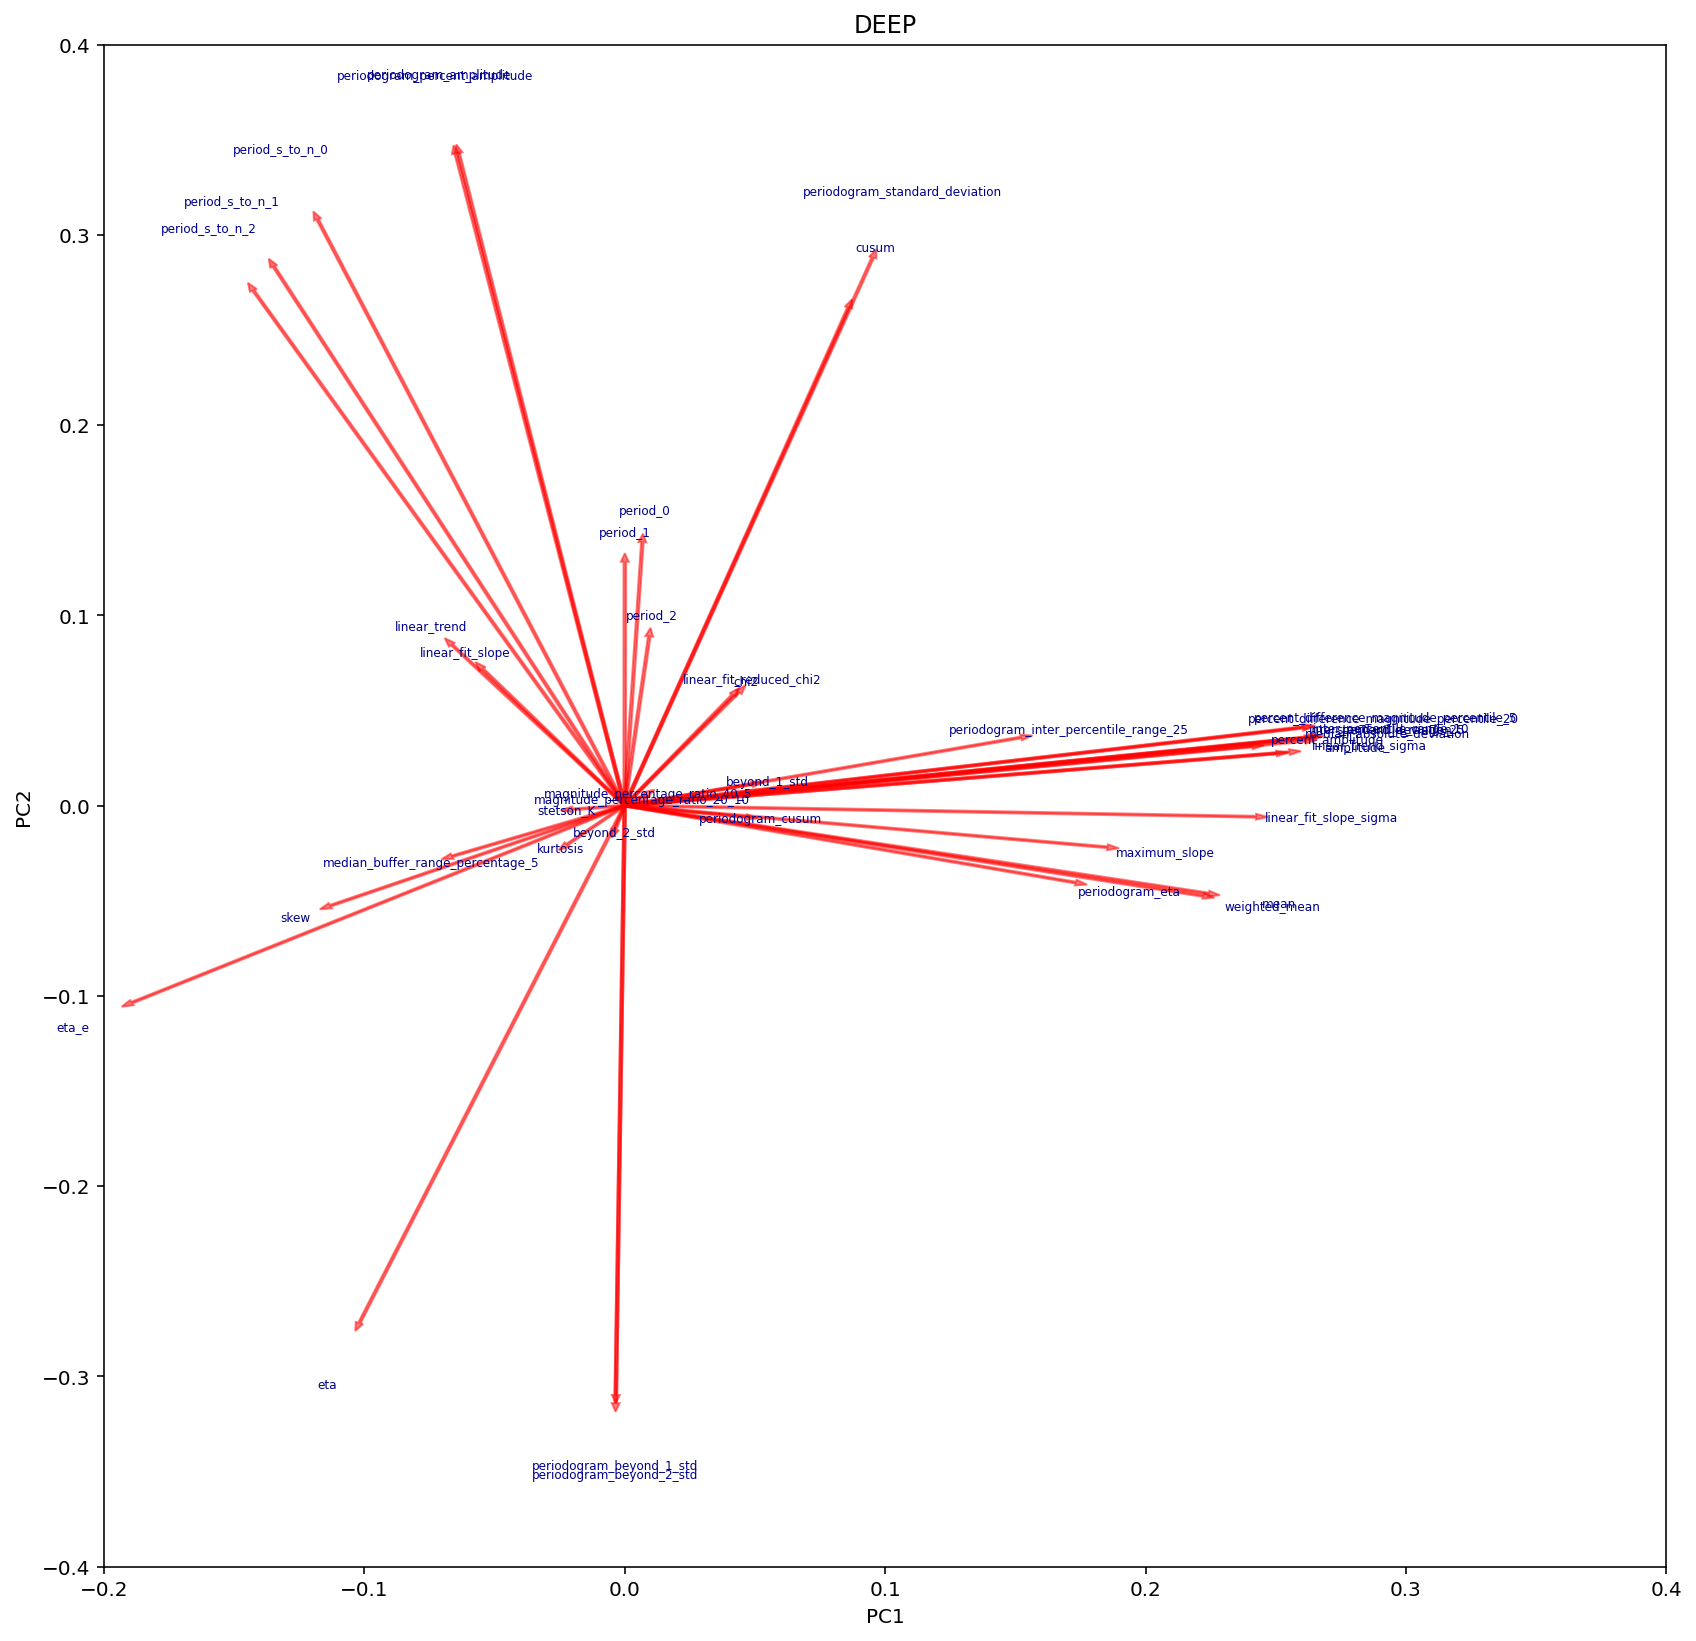

In [32]:
fig, ax = plt.subplots(figsize=(14, 14))

pca, x_new, score, coeff = applypca(deep) #apply Deep field

plt.xlim(-0.2,0.4)
plt.ylim(-0.4,0.4)
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("DEEP")

#Call the function. Use only the 2 PCs.
pcaplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), 'white') #just show components, not data
#plt.savefig('../figs/pca/deep_pca_importance.png', dpi=400, bbox_inches='tight') 

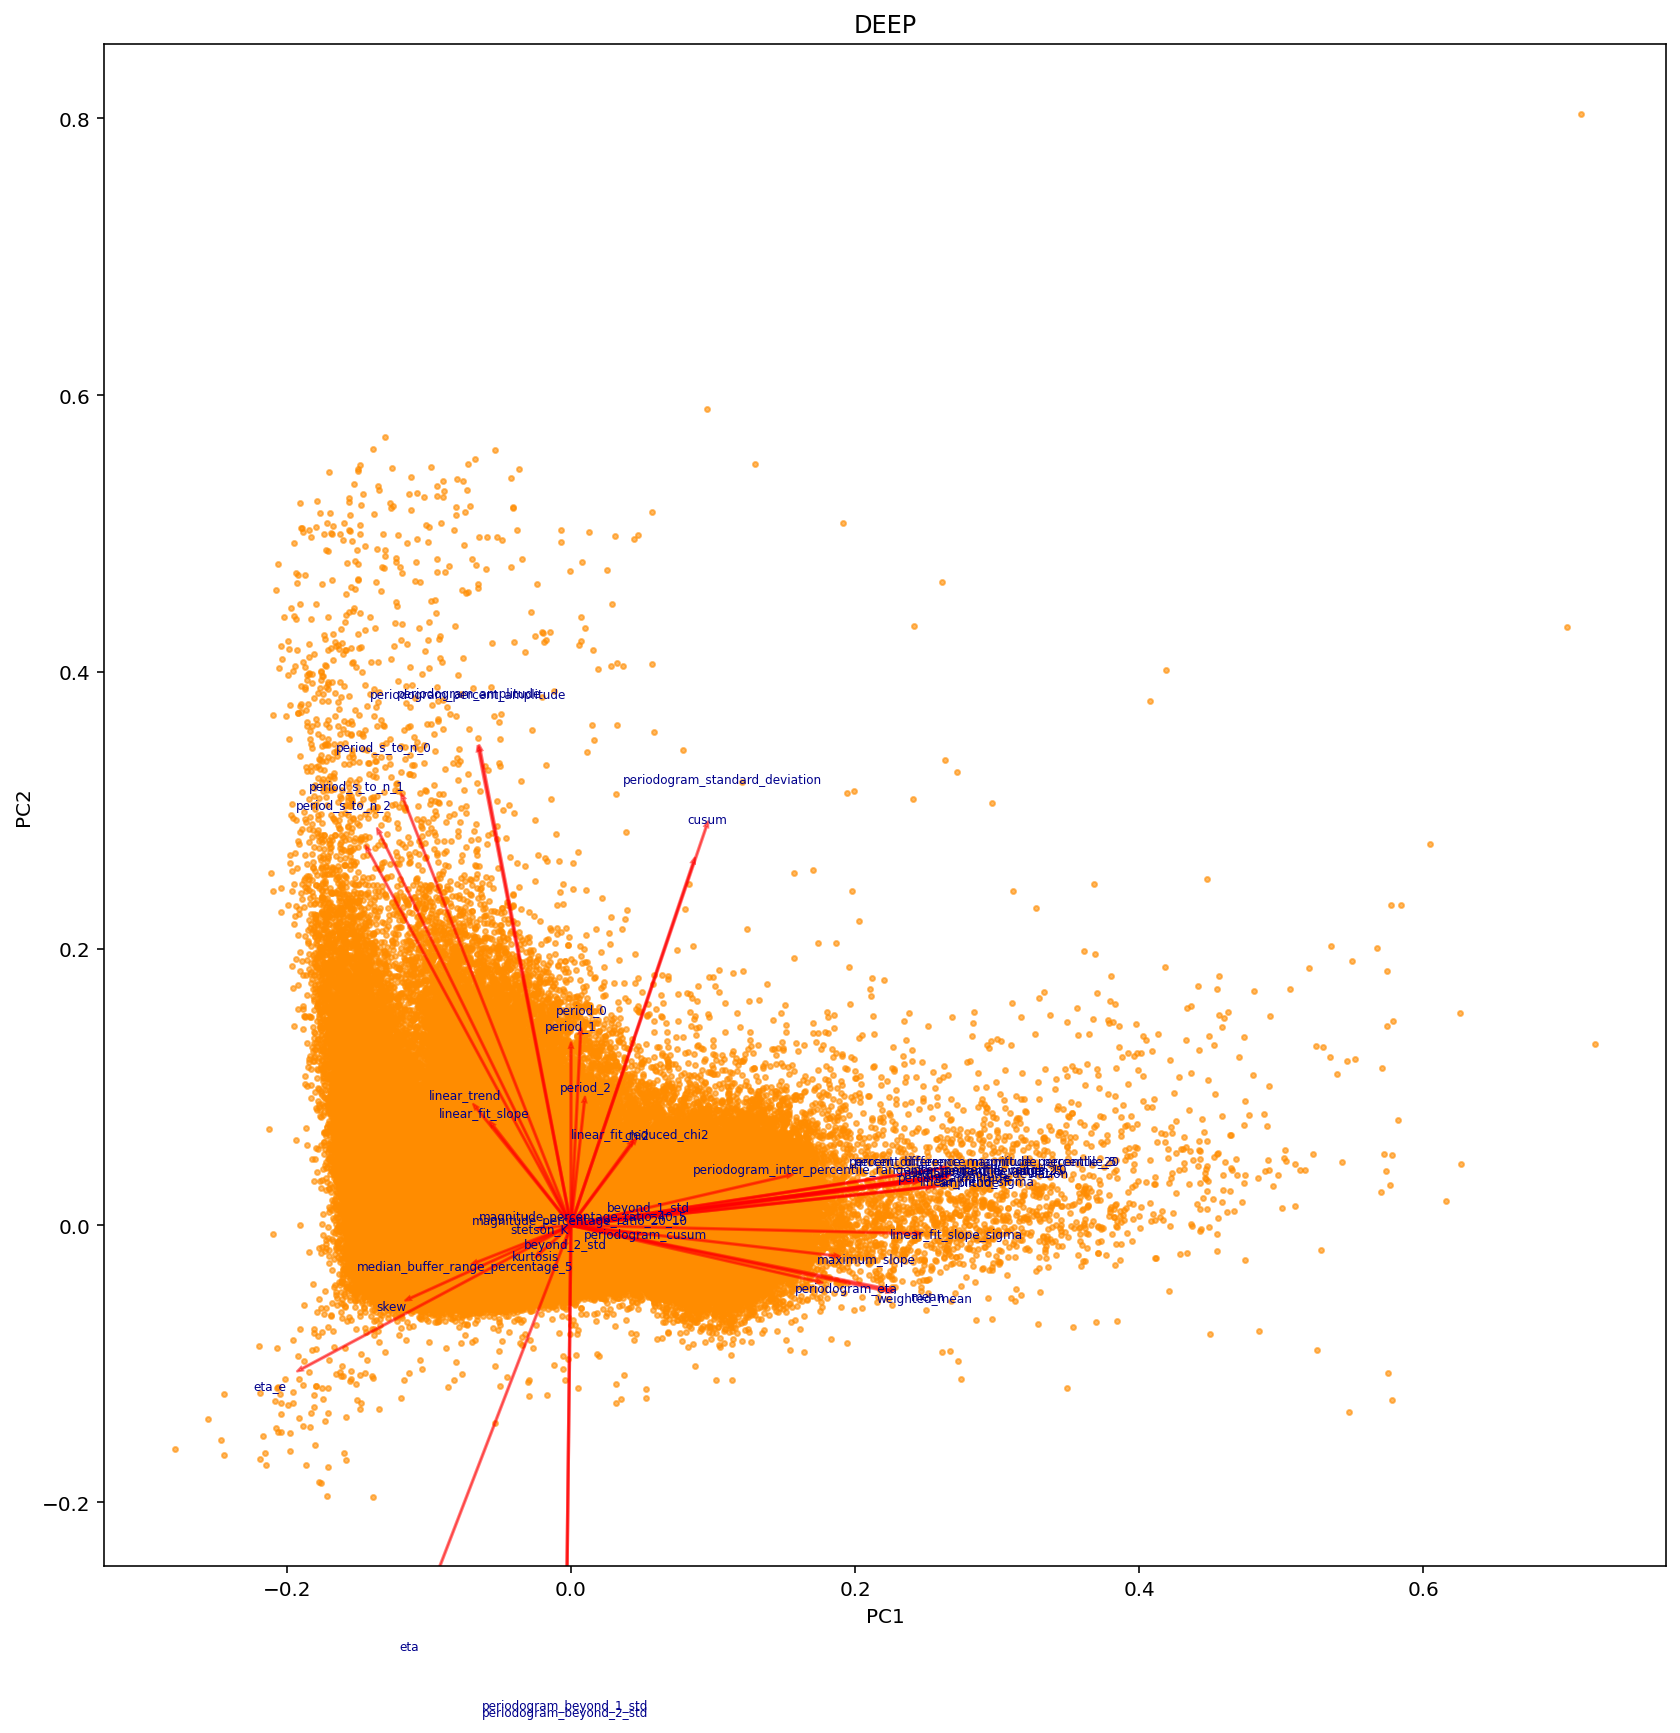

In [33]:
fig, ax = plt.subplots(figsize=(14, 14))
plt.xlabel("PC{}".format(1))
plt.ylabel("PC{}".format(2))
plt.title("DEEP")

pcaplot(x_new[:,0:2], np.transpose(pca.components_[0:2, :]), 'darkorange') 
#plt.savefig('../figs/pca/deep_pca_overlay_data.png', dpi=400, bbox_inches='tight') 

In [34]:
deep_pca_var_ratio = pca.explained_variance_ratio_
deep_pca_var_ratio

array([3.30839083e-01, 1.65770292e-01, 6.68013957e-02, 5.67478651e-02,
       4.40056176e-02, 4.11021357e-02, 3.46333497e-02, 2.47985825e-02,
       2.33381880e-02, 2.17114871e-02, 2.11133758e-02, 1.99657858e-02,
       1.92385017e-02, 1.88338924e-02, 1.52617986e-02, 1.48779401e-02,
       1.32618745e-02, 1.07423864e-02, 9.15490527e-03, 7.64960475e-03,
       6.25245674e-03, 5.59673682e-03, 5.07861806e-03, 4.85461658e-03,
       4.26060876e-03, 3.84531208e-03, 3.11307751e-03, 2.53717334e-03,
       1.58270998e-03, 6.46678733e-04, 5.19820489e-04, 4.32550518e-04,
       4.03452494e-04, 3.10351281e-04, 2.51909685e-04, 1.83818112e-04,
       1.38031121e-04, 5.94990636e-05, 5.33841947e-05, 2.99102749e-05,
       1.10973491e-06, 1.12428792e-07])

In [35]:
np.cumsum(deep_pca_var_ratio)

array([0.33083908, 0.49660938, 0.56341077, 0.62015864, 0.66416425,
       0.70526639, 0.73989974, 0.76469832, 0.78803651, 0.809748  ,
       0.83086137, 0.85082716, 0.87006566, 0.88889955, 0.90416135,
       0.91903929, 0.93230117, 0.94304355, 0.95219846, 0.95984806,
       0.96610052, 0.97169726, 0.97677587, 0.98163049, 0.9858911 ,
       0.98973641, 0.99284949, 0.99538666, 0.99696937, 0.99761605,
       0.99813587, 0.99856842, 0.99897187, 0.99928223, 0.99953414,
       0.99971795, 0.99985598, 0.99991548, 0.99996887, 0.99999878,
       0.99999989, 1.        ])

### PC1 explains 33.1% and PC2 16.6% of variance. Together, if we keep PC1 and PC2 only, they explain 49.7% of variance 

In [36]:
print(abs( pca.components_ )) #has shape (42, 42) [n_components, n_features]. 

[[2.5027907e-01 4.8895895e-02 3.6697686e-03 ... 2.6399526e-01
  2.0056916e-02 2.2212499e-01]
 [2.7381703e-02 1.1195697e-02 1.2580261e-02 ... 3.5933591e-02
  1.9924736e-03 4.7486845e-02]
 [1.2206027e-01 3.7620080e-01 3.3774674e-02 ... 3.4099955e-02
  3.7678537e-01 8.6400993e-02]
 ...
 [7.8610219e-02 7.1074590e-03 9.4995853e-03 ... 7.9523170e-01
  1.3340116e-02 4.0870477e-02]
 [6.7367088e-03 3.5858189e-04 8.4185274e-05 ... 5.3456873e-02
  5.6267977e-03 7.0098531e-01]
 [1.3206522e-04 3.3836768e-05 4.5038905e-07 ... 2.3014843e-04
  1.3013138e-04 2.1422207e-03]]


In [37]:
pca_num = []
for i in range(1, 43):
    pca_num.append('PCA{}'.format(i))

deep_pca_comp = pd.DataFrame(pca.components_, index=pca_num, columns=disk_names)
#deep_pca_comp.to_csv('../data/deep_pca_feature_importance.csv')
deep_pca_comp

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
PCA1,0.250279,0.048896,-3.669769e-03,0.085912,-0.101881,-0.189234,0.261276,0.262704,-0.022062,-0.054601,...,0.046677,0.173186,0.152227,0.095246,-0.064890,0.041467,-0.113004,0.263995,-0.020057,0.222125
PCA2,0.027382,0.011196,-1.258026e-02,0.261779,-0.271932,-0.103574,0.035435,0.036006,-0.020417,0.071858,...,-0.006077,-0.040501,0.035786,0.287994,0.342611,0.058168,-0.052625,0.035934,-0.001992,-0.047487
PCA3,0.122060,-0.376201,3.377467e-02,-0.037247,0.019887,0.039662,-0.014930,0.005635,0.308662,0.080546,...,0.105780,-0.087479,-0.078182,-0.082969,-0.021108,0.383842,-0.089703,0.034100,-0.376785,-0.086401
PCA4,-0.042274,0.303286,-1.538903e-01,-0.088381,0.121655,0.090487,0.065495,0.029510,-0.117118,-0.153463,...,-0.125996,-0.019933,-0.053059,-0.023941,0.038872,0.406520,0.113223,0.013447,0.365421,-0.093342
PCA5,-0.110140,-0.063028,-1.674090e-01,0.265454,-0.192903,-0.132160,-0.048810,-0.056193,0.167754,-0.167759,...,0.137101,-0.020719,0.362520,0.217307,-0.098622,0.057046,0.031138,-0.054714,-0.053785,-0.257235
PCA6,0.054127,-0.146556,-9.024492e-02,-0.152121,0.077747,0.023958,-0.021559,-0.019421,0.226393,-0.595149,...,-0.212131,0.038284,-0.110976,-0.006140,0.104398,-0.024831,-0.023798,-0.003740,-0.207311,0.031491
PCA7,-0.077636,0.008747,5.413842e-01,0.007617,-0.008544,0.017616,-0.026538,0.029141,-0.375440,-0.142187,...,-0.171153,-0.017399,0.097517,0.073942,-0.022919,0.112751,0.047101,0.009219,0.159885,-0.054061
PCA8,0.000089,0.029287,4.127665e-02,0.045063,-0.023573,0.046430,0.008440,0.006012,-0.051306,-0.085055,...,0.238073,-0.067362,-0.167565,-0.089774,-0.044443,0.007548,-0.044045,0.005379,0.036097,0.003867
PCA9,-0.019879,0.090935,1.105561e-01,0.062842,-0.140756,0.013909,0.007983,0.007724,-0.066282,-0.210813,...,0.766920,-0.109741,-0.317285,-0.108635,-0.043330,0.024120,-0.093441,0.002532,0.089133,-0.017030
PCA10,-0.002294,-0.004299,1.630130e-02,0.017776,0.002147,-0.016709,0.003156,0.004390,0.029274,-0.005224,...,0.023792,0.040977,0.015290,-0.014618,-0.000064,-0.008849,0.070714,0.002683,0.015541,0.000217


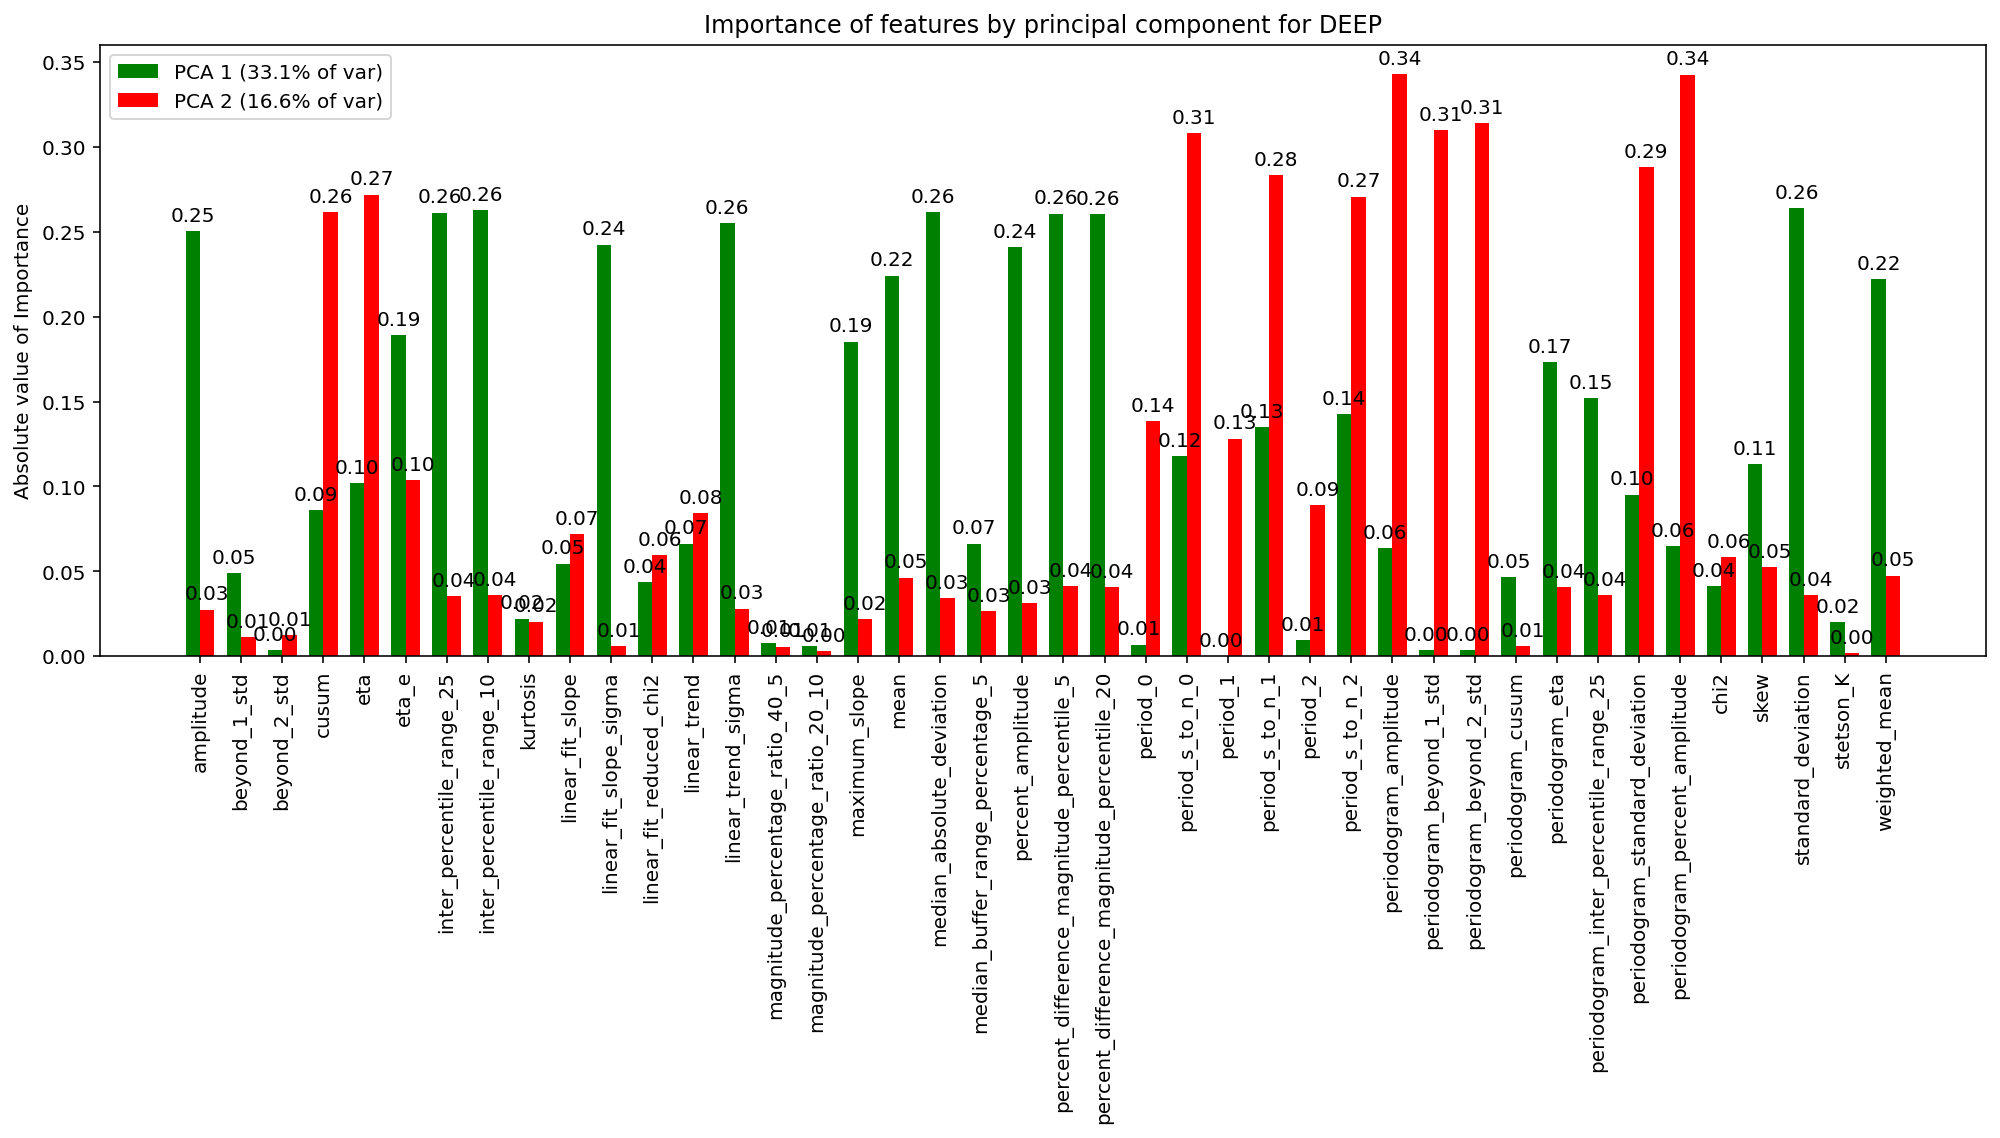

In [38]:
labels = deep_names
pca1 = abs(np.array(deep_pca_comp.loc[['PCA1']])[0])
pca2 = abs(np.array(deep_pca_comp.loc[['PCA2']])[0])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(14, 8))
rects1 = ax.bar(x - width/2, pca1, width, label='PCA 1 (33.1% of var)', color='g')
rects2 = ax.bar(x + width/2, pca2, width, label='PCA 2 (16.6% of var)', color='r')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Absolute value of Importance')
ax.set_title('Importance of features by principal component for DEEP')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation='vertical')
ax.legend(loc='upper left')


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{0:.2f}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

#plt.savefig('../figs/pca/deep_pca_barchart.png', dpi=400, bbox_inches='tight') 

## DEEP PCA1

In [39]:
deep_pca_comp.loc[['PCA1']] #most important principal component (remember 33.1% variance)

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
PCA1,0.250279,0.048896,-0.00367,0.085912,-0.101881,-0.189234,0.261276,0.262704,-0.022062,-0.054601,...,0.046677,0.173186,0.152227,0.095246,-0.06489,0.041467,-0.113004,0.263995,-0.020057,0.222125


In [40]:
ordered_deep_pca1 = OrderedDict(sorted(deep_pca_comp.loc[['PCA1']].items(), key=lambda item:np.max(item[1])))
for key, value in ordered_deep_pca1.items():
    print(key, value)

eta_e PCA1   -0.189234
Name: eta_e, dtype: float32
period_s_to_n_2 PCA1   -0.1426
Name: period_s_to_n_2, dtype: float32
period_s_to_n_1 PCA1   -0.134771
Name: period_s_to_n_1, dtype: float32
period_s_to_n_0 PCA1   -0.117934
Name: period_s_to_n_0, dtype: float32
skew PCA1   -0.113004
Name: skew, dtype: float32
eta PCA1   -0.101881
Name: eta, dtype: float32
linear_trend PCA1   -0.066346
Name: linear_trend, dtype: float32
median_buffer_range_percentage_5 PCA1   -0.066244
Name: median_buffer_range_percentage_5, dtype: float32
periodogram_percent_amplitude PCA1   -0.06489
Name: periodogram_percent_amplitude, dtype: float32
periodogram_amplitude PCA1   -0.063805
Name: periodogram_amplitude, dtype: float32
linear_fit_slope PCA1   -0.054601
Name: linear_fit_slope, dtype: float32
kurtosis PCA1   -0.022062
Name: kurtosis, dtype: float32
stetson_K PCA1   -0.020057
Name: stetson_K, dtype: float32
beyond_2_std PCA1   -0.00367
Name: beyond_2_std, dtype: float32
periodogram_beyond_2_std PCA1   -0.003

### most imporant features for PCA1: standard_deviation, inter_percentile_range_10, median_absolute_deviation, inter_percentile_range_25, percent_difference_magnitude_percentile_5

## DEEP PCA2

In [41]:
deep_pca_comp.loc[['PCA2']] #second most important principal component (remember 16.6% variance)

,amplitude,beyond_1_std,beyond_2_std,cusum,eta,eta_e,inter_percentile_range_25,inter_percentile_range_10,kurtosis,linear_fit_slope,...,periodogram_cusum,periodogram_eta,periodogram_inter_percentile_range_25,periodogram_standard_deviation,periodogram_percent_amplitude,chi2,skew,standard_deviation,stetson_K,weighted_mean
PCA2,0.027382,0.011196,-0.01258,0.261779,-0.271932,-0.103574,0.035435,0.036006,-0.020417,0.071858,...,-0.006077,-0.040501,0.035786,0.287994,0.342611,0.058168,-0.052625,0.035934,-0.001992,-0.047487


In [42]:
ordered_deep_pca2 = OrderedDict(sorted(deep_pca_comp.loc[['PCA2']].items(), key=lambda item:np.max(item[1])))
for key, value in ordered_deep_pca2.items():
    print(key, value)

periodogram_beyond_2_std PCA2   -0.314096
Name: periodogram_beyond_2_std, dtype: float32
periodogram_beyond_1_std PCA2   -0.309769
Name: periodogram_beyond_1_std, dtype: float32
eta PCA2   -0.271932
Name: eta, dtype: float32
eta_e PCA2   -0.103574
Name: eta_e, dtype: float32
skew PCA2   -0.052625
Name: skew, dtype: float32
weighted_mean PCA2   -0.047487
Name: weighted_mean, dtype: float32
mean PCA2   -0.046229
Name: mean, dtype: float32
periodogram_eta PCA2   -0.040501
Name: periodogram_eta, dtype: float32
median_buffer_range_percentage_5 PCA2   -0.02662
Name: median_buffer_range_percentage_5, dtype: float32
maximum_slope PCA2   -0.02192
Name: maximum_slope, dtype: float32
kurtosis PCA2   -0.020417
Name: kurtosis, dtype: float32
beyond_2_std PCA2   -0.01258
Name: beyond_2_std, dtype: float32
periodogram_cusum PCA2   -0.006077
Name: periodogram_cusum, dtype: float32
linear_fit_slope_sigma PCA2   -0.005884
Name: linear_fit_slope_sigma, dtype: float32
stetson_K PCA2   -0.001992
Name: stet

### most imporant features for PCA2: periodogram_amplitude, periodogram_percent_amplitude, period_s_to_n_0, periodogram_standard_deviation, period_s_to_n_2

### PC3 

In [43]:
ordered_deep_pca1 = OrderedDict(sorted(deep_pca_comp.loc[['PCA3']].items(), key=lambda item:np.max(item[1])))
for key, value in ordered_deep_pca1.items():
    print(key, value)

stetson_K PCA3   -0.376785
Name: stetson_K, dtype: float32
beyond_1_std PCA3   -0.376201
Name: beyond_1_std, dtype: float32
median_buffer_range_percentage_5 PCA3   -0.28917
Name: median_buffer_range_percentage_5, dtype: float32
magnitude_percentage_ratio_40_5 PCA3   -0.189515
Name: magnitude_percentage_ratio_40_5, dtype: float32
magnitude_percentage_ratio_20_10 PCA3   -0.173857
Name: magnitude_percentage_ratio_20_10, dtype: float32
linear_fit_slope_sigma PCA3   -0.128996
Name: linear_fit_slope_sigma, dtype: float32
skew PCA3   -0.089703
Name: skew, dtype: float32
periodogram_eta PCA3   -0.087479
Name: periodogram_eta, dtype: float32
weighted_mean PCA3   -0.086401
Name: weighted_mean, dtype: float32
periodogram_standard_deviation PCA3   -0.082969
Name: periodogram_standard_deviation, dtype: float32
mean PCA3   -0.079947
Name: mean, dtype: float32
periodogram_inter_percentile_range_25 PCA3   -0.078182
Name: periodogram_inter_percentile_range_25, dtype: float32
cusum PCA3   -0.037247
Name

# TL;DR SUMMARY

> ## M31

### PC1 explains 29.3% and PC2 17.8%. Together,  they explain 47.1% of variance.
#### PCA1 MOST IMPORTANT: standard_deviation,  inter_percentile_range_10, percent_difference_magnitude_percentile_5, linear_trend_sigma, median_absolute_deviation, are the most important.
#### PCA2 MOST IMPORTANT: periodogram_amplitude, periodogram_percent_amplitude, period_s_to_n_0, periodogram_standard_deviation, period_s_to_n_1 


> ## DISK

### PC1 explains 33.0% and PC2 17.2%. Together, they explain 50.2% of variance.
#### PCA1 MOST IMPORTANT: inter_percentile_range_10, linear_fit_slope_sigma, median_absolute_deviation, standard_deviation, linear_trend_sigma
#### PCA2 MOST IMPORTANT: periodogram_amplitude, periodogram_percent_amplitude, cusum, periodogram_standard_deviation, period_s_to_n_2


> ## DEEP

### PC1 explains 33.1% and PC2 16.6%. Together, they explain 49.7% of variance.
#### PCA1 MOST IMPORTANT: standard_deviation, inter_percentile_range_10, median_absolute_deviation, inter_percentile_range_25, percent_difference_magnitude_percentile_5
#### PCA2 MOST IMPORTANT: periodogram_amplitude, periodogram_percent_amplitude, period_s_to_n_0, periodogram_standard_deviation, period_s_to_n_2

# THE SAME MOST IMPORTANT FEATURES ACROSS FIELDS ARE
> PCA1: 

i) standard_deviation (3 fields),  
ii) inter_percentile_range_10 (3 fields),   
iii) median_absolute_deviation (3 fields),  
iv) percent_difference_magnitude_percentile_5 (2 fields),  
v) linear_trend_sigma (2 fields)

> PCA2: 

i) periodogram_amplitude (3 fields),  
ii) periodogram_percent_amplitude (3 fields),  
iii) periodogram_standard_deviation (3 fields)  
iv) period_s_to_n_0, (2 fields),   
v)  period_s_to_n_2 (2 fields)

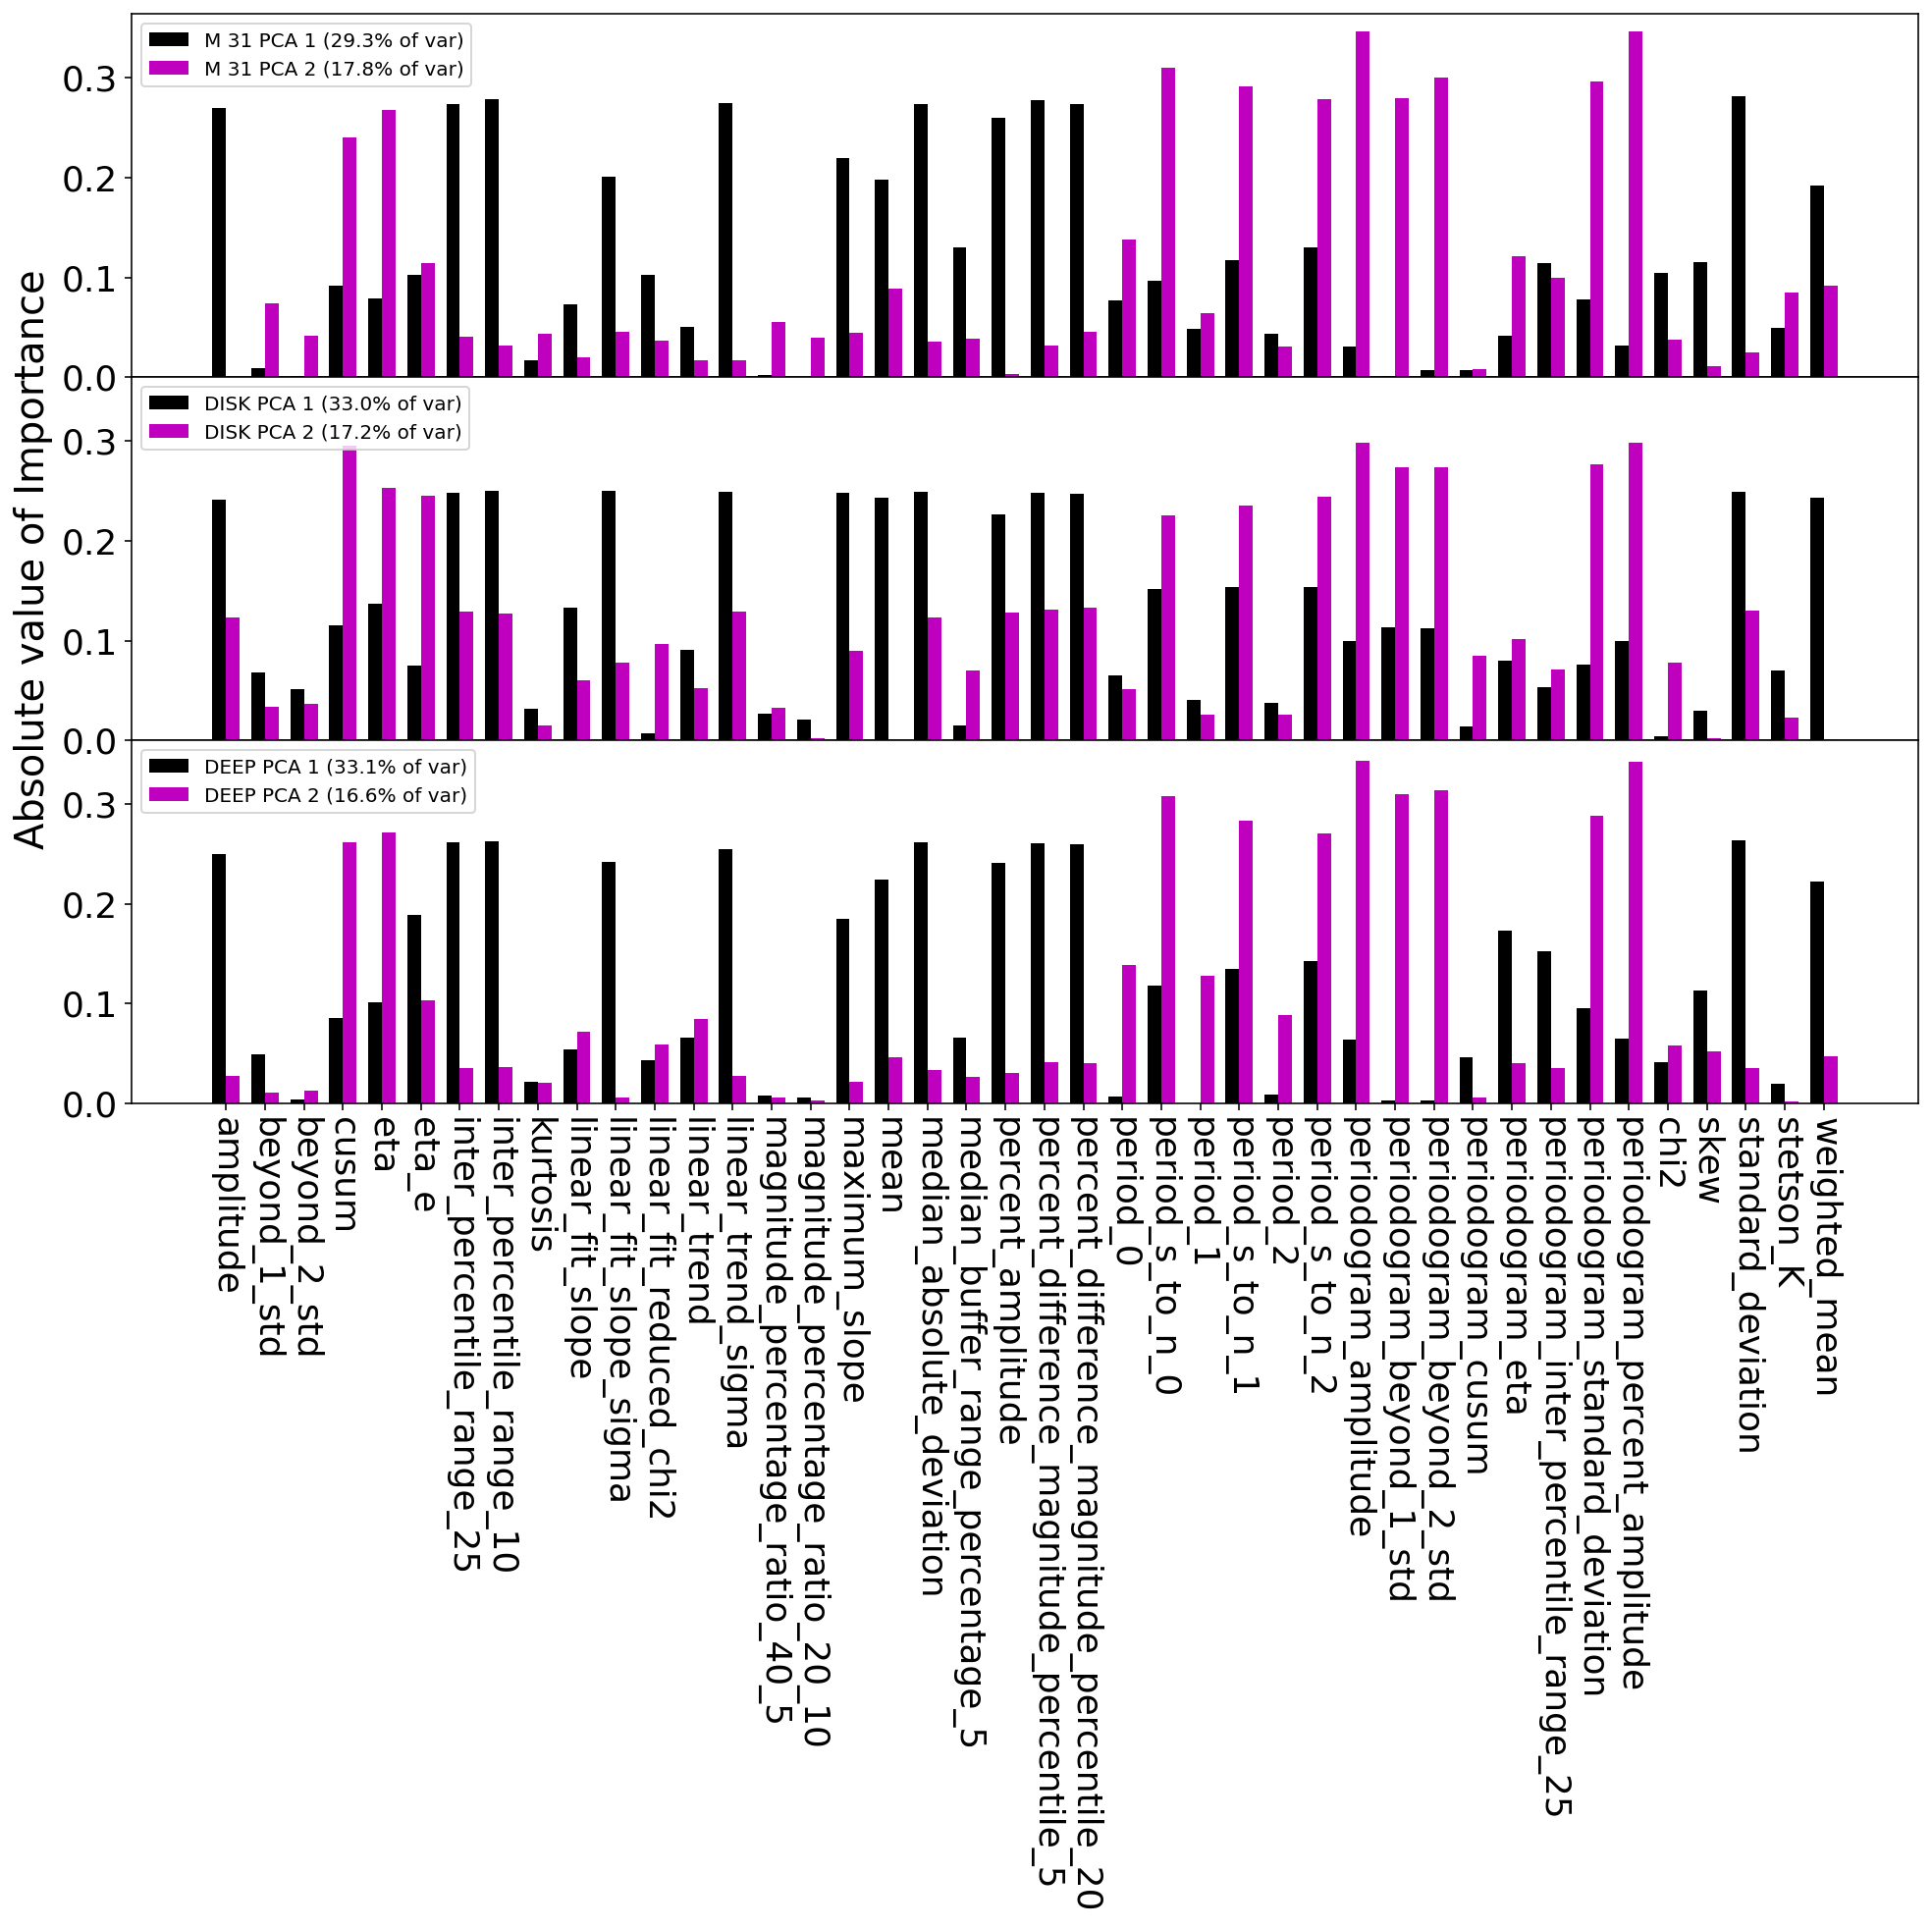

In [44]:
# Combined features important plot for paper
import matplotlib.gridspec as gridspec
plt.rcParams.update({'font.size': 18})

labels = m31_names
m31_pca1 = abs(np.array(m31_pca_comp.loc[['PCA1']])[0])
m31_pca2 = abs(np.array(m31_pca_comp.loc[['PCA2']])[0])
disk_pca1 = abs(np.array(disk_pca_comp.loc[['PCA1']])[0])
disk_pca2 = abs(np.array(disk_pca_comp.loc[['PCA2']])[0])
deep_pca1 = abs(np.array(deep_pca_comp.loc[['PCA1']])[0])
deep_pca2 = abs(np.array(deep_pca_comp.loc[['PCA2']])[0])

x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

fig, (ax, ax2, ax3) = plt.subplots(3, 1, sharex=True, sharey=True, figsize=(14, 14), 
                                   gridspec_kw = {'wspace':0, 'hspace':0})


m31_rects1 = ax.bar(x - width/2, m31_pca1, width, label='M 31 PCA 1 (29.3% of var)', color='k')
m31_rects2 = ax.bar(x + width/2, m31_pca2, width, label='M 31 PCA 2 (17.8% of var)', color='m')
disk_rects1 = ax2.bar(x - width/2, disk_pca1, width, label='DISK PCA 1 (33.0% of var)', color='k')
disk_rects2 = ax2.bar(x + width/2, disk_pca2, width, label='DISK PCA 2 (17.2% of var)', color='m')
deep_rects1 = ax3.bar(x - width/2, deep_pca1, width, label='DEEP PCA 1 (33.1% of var)', color='k')
deep_rects2 = ax3.bar(x + width/2, deep_pca2, width, label='DEEP PCA 2 (16.6% of var)', color='m')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax2.set_ylabel('Absolute value of Importance', fontsize=20)
ax3.set_xticks(x)
ax3.set_xticklabels(labels, rotation=-90)
ax.legend(loc='upper left', fontsize=10)
ax2.legend(loc='upper left', fontsize=10)
ax3.legend(loc='upper left', fontsize=10)

fig.tight_layout()
plt.savefig('../figs/pca/all_fields_PCA_importance_barchart.png', dpi=400, bbox_inches='tight')